## Pre-explanation

1. In this notebook I analyzed the peak in the weekly sales (sum up of 1115 stores)  plot that we talked about in the 1:1, 
you can find the analysis from cell 34 to cell 38.
(The peak was at Christmas time, so I observed the same trend in individual store too.)

2. Under cell 78, you can find 'msg to my mentor’, explaining what I am planning to do for the next step.

3. Question:
+ Shall I use histogram or violinplot when showing distribution when doing EDA by store type and assortment type

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3/Data') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone3/Notebook
/Users/liuyang/Desktop/Springboard_Capstone3/Data


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df.shape

(1017209, 9)

In [6]:
df = df.sort_values(['Date', 'Store'], ascending=True)

In [7]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1016096,2,2,2013-01-01,0,0,0,0,a,1
1016097,3,2,2013-01-01,0,0,0,0,a,1
1016098,4,2,2013-01-01,0,0,0,0,a,1
1016099,5,2,2013-01-01,0,0,0,0,a,1


In [8]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [9]:
class data_process:
    
    def __init__(self, data):
        self.data = data
        self.count = data.nunique()
        self.va_pct = round(self.count/(data.shape[0])*100,4)
        self.nan_p = nan_p = round(data.isnull().sum()/data.shape[0]*100,4)
        
    
    def data_info(self):
        frame = pd.DataFrame(zip(self.count,self.va_pct,self.nan_p), 
                             index=self.count.index, 
        columns=['counts','unique_value_pct', 'nan_pct']).reset_index().rename(columns={'index': 'column'})

        frame['data_type']= self.data.dtypes.tolist()
        return frame.sort_values('counts', ascending=False)
   

    def convert_datetime(self, datecol):
        self.data[datecol] = pd.to_datetime(self.data[datecol], format='%Y-%m-%d')
    
#     def int_to_str(self, col):
#         self.data[col] = self.data[col].astype('str')
    
    def convert_dtype(self):
        catcolumns = self.data.select_dtypes(include=['object']).columns.tolist()
        return pd.get_dummies(self.data, columns=catcolumns)
    
    
    def pivot_table(self, index, aggfunc):
        return pd.pivot_table(self.data, index=index, aggfunc=aggfunc)

In [10]:
class Sales_EDA:
    def __init__(self, data):
        self.data=data
    
        
    def nlargest_ID(self, N):
        topN_storeID = self.data.groupby('Store')['Sales'].sum().nlargest(N).index.tolist()
        return topN_storeID
    
    def nsmallest_ID(self, N):
        bottomN_storeID = self.data.groupby('Store')['Sales'].sum().nsmallest(N).index.tolist()
        return bottomN_storeID
    
    def topN_weekly_salesplot(self, N):
        plt.figure(figsize=(12, 7))
        for storeid in self.nlargest_ID(N):
            self.data.loc[self.data.Store==storeid].set_index('Date').Sales.resample('w').sum().plot(label= f'Store {storeid}')
        plt.legend()
        plt.title(f'Weekly Sales of Top {N} Store', fontsize=15)
        plt.xlabel('Date', fontsize=15)
        plt.ylabel('Weekly Sales', fontsize=15)
        plt.show()
        
    def bottomN_weekly_salesplot(self, N):
        plt.figure(figsize=(12, 7))
        for storeid in self.nsmallest_ID(N):
            self.data.loc[self.data.Store==storeid].set_index('Date').Sales.resample('w').sum().plot(label= f'Store {storeid}')
        plt.legend()
        plt.title(f'Weekly Sales of Bottom {N} Store', fontsize=15)
        plt.xlabel('Date', fontsize=15)
        plt.ylabel('Weekly Sales', fontsize=15)
        plt.show()
    
    
    def topN_daily_violinplot(self, N):
        plt.figure(figsize=(12, 7))
        N_data = self.data.loc[self.data.Store.isin(self.nlargest_ID(N))]
        sns.violinplot(x='Sales', y='Store', 
                       data=N_data, order=self.nlargest_ID(N),
                      orient='h')
        plt.title('Daily Sales of Top10 Stores', fontsize=15)
        plt.xlabel('Sales', fontsize=15)
        plt.ylabel('Store', fontsize=15)
        plt.show()

    def bottomN_daily_violinplot(self, N):
        plt.figure(figsize=(12, 7))
        b_N_data = self.data.loc[self.data.Store.isin(self.nsmallest_ID(N))]
        sns.violinplot(x='Sales', y='Store', 
                       data=b_N_data, order=self.nsmallest_ID(N),
                      orient='h')
        
        #sns.violinplot(x='Store', y='Sales', data=df.loc[df.Store.isin(self.nsmallest_ID(N))])
        plt.title('Daily Sales of Bottom Stores', fontsize=15)
        plt.xlabel('Daily Sales', fontsize=15)
        plt.ylabel('Store ID', fontsize=15)
        plt.show()

In [11]:
class sumby:
    def __init__(self, data, groupbycol, aggcol):
        self.data = data
        self.groupbycol = groupbycol
        self.aggcol = aggcol
       
        
    def get_sum_pct(self):
        total = self.data.groupby(self.groupbycol)[self.aggcol].sum()
        total = pd.DataFrame(total)
        total['pct'] = (total[self.aggcol]/total[self.aggcol].sum())*100
        total = total.sort_values(self.aggcol, ascending=False)
        total = total.reset_index()
        return total
    
    def histgram(self,col):
        self.get_sum_pct()[col].hist()
        per50 = self.get_sum_pct()[col].describe()['50%']
        mean = self.get_sum_pct()[col].describe()['mean']
        plt.axvline(per50,color='r')
        plt.axvline(mean, color='r', linestyle='-.')
        plt.legend(['median', 'mean'])
        plt.title(f'Total {self.aggcol} by {self.groupbycol}', fontsize=15)
        plt.show()
    
    def topN_barplot(self, N):
        bardata = self.get_sum_pct().set_index(self.groupbycol)
        plt.figure(figsize=(12,7))
        sns.barplot(y = bardata.Sales.nlargest(N).index, 
                    x = bardata.Sales.nlargest(N).values, 
                    order = bardata.Sales.nlargest(N).index,
                   orient='h')            
        plt.title(f'Total {self.aggcol} of Top {N} Stores', fontsize=15)
        plt.xlabel(self.aggcol, fontsize=15)
        plt.ylabel(self.groupbycol, fontsize=15)
    
    def topN_sum_share(self, N):
        top10sum = round(self.get_sum_pct().iloc[:N].sum()[1],0)
        top10pct = round(self.get_sum_pct().iloc[:N].sum()[2],3)
        if len(self.data) > 1115:
            print(f'Top {N} {self.groupbycol} Total {self.aggcol}: {top10sum}')
            print(f'Top {N} {self.groupbycol} Total {self.aggcol} Share in All Stores: {top10pct}%')
        else:
            storetype = list(set(self.data.StoreType))[0].upper()
            print(f'{storetype} Type Store Top {N} {self.groupbycol} Total {self.aggcol}: {top10sum}')
            print(f'{storetype} Type Store Top {N} {self.groupbycol} Total {self.aggcol} Share: {top10pct}%')

In [12]:
class individual_store:
    def __init__(self, data, indexcol, storeid):
        self.data = data
        self.indexcol = indexcol
        self.storeid=storeid
        self.total_sales = sumby(self.data,'Store', 'Sales').get_sum_pct()
        self.id_total = self.total_sales.loc[self.total_sales.Store==self.storeid]
        self.storesales = self.id_total.iloc[0][1]
        self.ranking = self.id_total.index[0]+1
        self.share = round(self.id_total.iloc[0][2],3)
        self.opendays = self.data.loc[self.data.Store==self.storeid].set_index(self.indexcol).Open.value_counts()[1]
        if len(self.data.loc[self.data.Store==self.storeid].set_index(self.indexcol).Open.value_counts().index)==2:
            self.closeddays = self.data.loc[self.data.Store==self.storeid].set_index(self.indexcol).Open.value_counts()[0]
        else:
            self.closeddays=0
 
    def store_opendays(self):
        print(f'Store {self.storeid} open days: {self.opendays}')
        print(f'Store {self.storeid} closed days: {self.closeddays}')

            
    def get_sales_share_ranking(self):
        storenumber = len(set(self.data.Store))
        print(f'Total Sales of Store {self.storeid} is {self.storesales}')
        print(f'Sales share among {storenumber} stores : {self.share}%')
        print(f'Ranking among {storenumber} stores : {self.ranking}')
     
    def lineplot(self,col):
        plt.figure(figsize=(12, 7))
        dailydata = self.data.loc[self.data.Store==self.storeid].set_index('Date')[col]
        plt.plot(dailydata)
        plt.plot(dailydata.index,dailydata.rolling(14).mean(), 'red')
        plt.plot(dailydata.resample('w').sum(), 'green')
        plt.legend([f'Daily {col}', 'Rolling mean (14D)', f'Weekly {col}'])
        plt.title(f'{col} of store {self.storeid}', fontsize=15)
        plt.show()
        
    def store_report(self):
        storetype = newstoredata.loc[newstoredata.Store==self.storeid].StoreType.iloc[0]
        assortmenttype = newstoredata.loc[newstoredata.Store==self.storeid].Assortment.iloc[0]
        storetypedata = sumby(newstoredata.loc[newstoredata.StoreType==storetype],'Store', 'Sales').get_sum_pct()
        assortttypedata = sumby(newstoredata.loc[newstoredata.Assortment==assortmenttype],'Store', 'Sales').get_sum_pct()
        ranking2 = storetypedata.loc[storetypedata.Store==self.storeid].index[0]+1
        ranking3 = assortttypedata.loc[assortttypedata.Store==self.storeid].index[0]+1
        storenumber2 = len(storetypedata)
        storenumber3 = len(assortttypedata)
        share2 = round(storetypedata.iloc[0][2],3)
        share3 = round(assortttypedata.iloc[0][2],3)
                                        
        
        return pd.DataFrame([self.storeid,storetype.upper(),assortmenttype.upper(), self.opendays, 
                             self.closeddays, self.storesales,self.share, share2, share3, 
                             self.ranking, ranking2, ranking3],
                           index=['Storeid', 'Store Type', 'Assortment', 'Open Days',
                                 'Closed Days', 'Total Sales', 'Share in All Store (%)', 
                                 f'Share in {storetype.upper()} Type (%)', 
                                 f'Share in {assortmenttype.upper()} Assortment (%)',
                                 'Ranking in All Store',
                                 f'Ranking in {storetype.upper()} Type', 
                                 f'Ranking in {assortmenttype.upper()} Assortment'],
                           columns=['Detail'])
    
        

In [13]:
df_process = data_process(df)

In [14]:
df_process.convert_datetime('Date')

In [15]:
df_process.data_info()

,column,counts,unique_value_pct,nan_pct,data_type
3,Sales,21734,2.1366,0.0,int64
4,Customers,4086,0.4017,0.0,int64
0,Store,1115,0.1096,0.0,int64
2,Date,942,0.0926,0.0,datetime64[ns]
1,DayOfWeek,7,0.0007,0.0,int64
7,StateHoliday,5,0.0005,0.0,object
5,Open,2,0.0002,0.0,int64
6,Promo,2,0.0002,0.0,int64
8,SchoolHoliday,2,0.0002,0.0,int64


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [17]:
period_days = len(set(df.Date))
period_weeks = len(df.set_index('Date').groupby('Date').resample('w'))
numberOfstore = len(set(df.Store))

print(f'Data contains data of {numberOfstore} stores')
print(f'Data contains data of {period_days} days (2013-01-01 ~ 2015-07-31)')
print(f'Data contains data of {period_weeks} weeks')

Data contains data of 1115 stores
Data contains data of 942 days (2013-01-01 ~ 2015-07-31)
Data contains data of 135 weeks


## Daily Sales

In [18]:
def histplot_mean_median(data, col):
    data[col].hist()
    per50 = data[col].describe()['50%']
    mean = data[col].describe()['mean']
    plt.axvline(per50,color='r')
    plt.axvline(mean, color='r', linestyle='-.')
    plt.legend(['median', 'mean'])

    plt.title(f'Daily {col} Distribution', fontsize=15)
    plt.show()

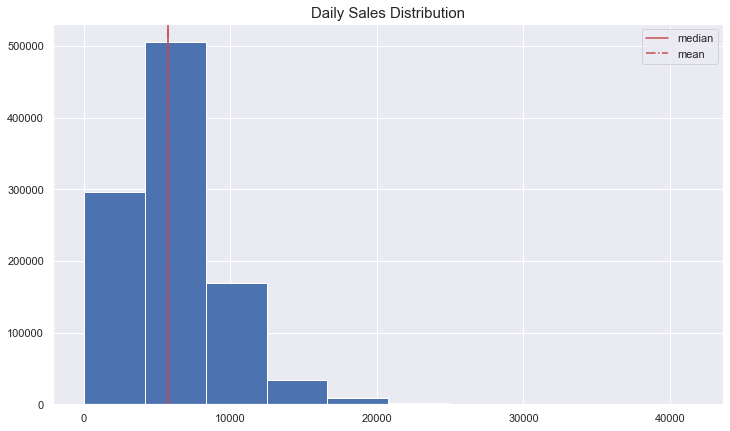

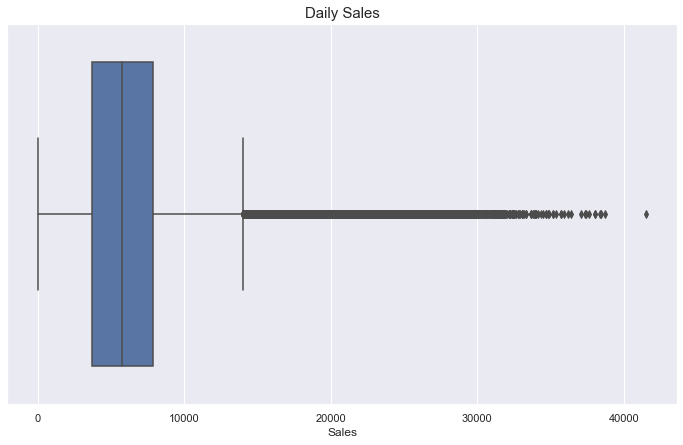

In [19]:
# check daily sales of 1115 stores over 942 days
plt.rcParams['figure.figsize'] = (12, 7)
histplot_mean_median(df, 'Sales')

sns.boxplot(x=df.Sales)
plt.title('Daily Sales', fontsize=15)
plt.show()

In the histogram, we can see mean and median are very close to each other

In [20]:
# check the details of daily sales outlier
df.loc[df.Sales.idxmax()]

Store                            909
DayOfWeek                          1
Date             2015-06-22 00:00:00
Sales                          41551
Customers                       1721
Open                               1
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
Name: 44393, dtype: object

Store 909 open days: 607
Store 909 closed days: 151


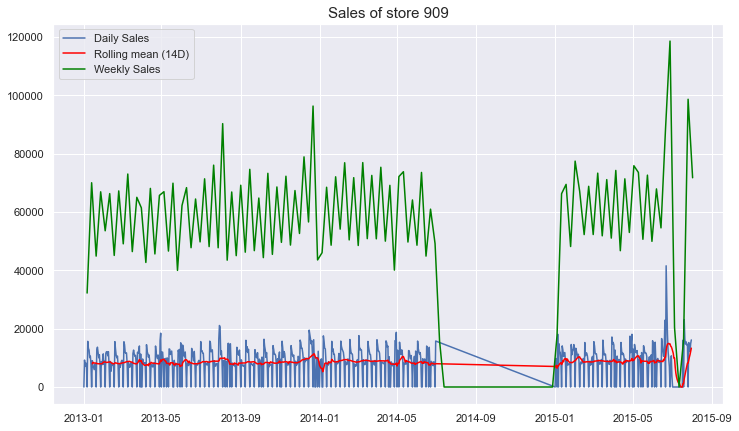

In [21]:
# check store open days and sales plot for store 909
storeid=909
store909 = individual_store(df, 'Date', storeid)

store909.store_opendays()
store909.lineplot('Sales')

We can see the sales peak happens at 2015-06-22.
By analyzing the sales plot of store 909 we can see the peak was just an one time exception.

## Daily Customer

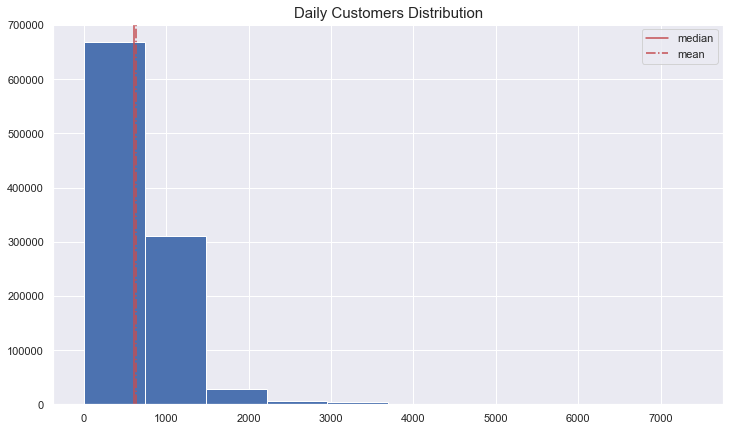

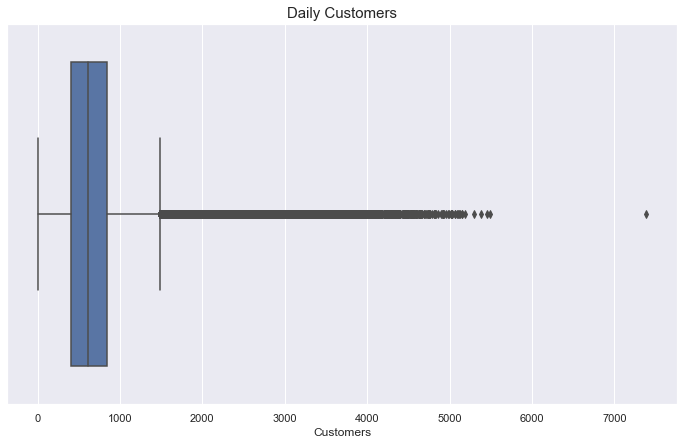

In [22]:
# check daily customers of 1115 stores over 942 days
histplot_mean_median(df, 'Customers')

sns.boxplot(x=df.Customers)
plt.title('Daily Customers', fontsize=15)
plt.show()

In [23]:
# check the details of daily customers outlier
df.loc[df.Customers.idxmax()]

Store                            817
DayOfWeek                          2
Date             2013-01-22 00:00:00
Sales                          27190
Customers                       7388
Open                               1
Promo                              1
StateHoliday                       0
SchoolHoliday                      0
Name: 993496, dtype: object

Store 817 open days: 784
Store 817 closed days: 158


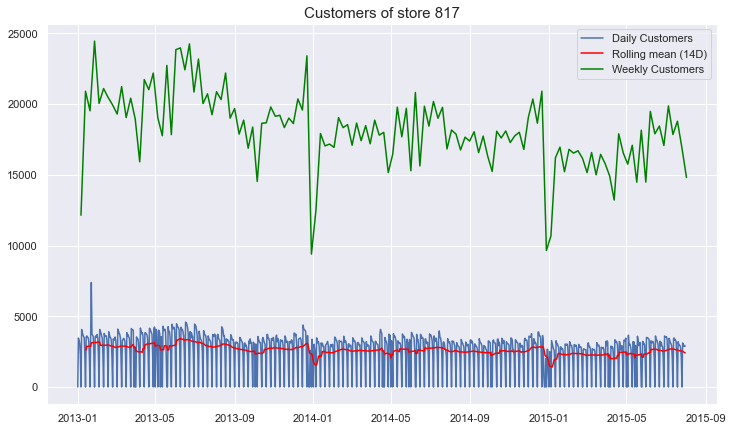

In [24]:
# check the customer line plot for store 817
storeid=817
store817 = individual_store(df, 'Date',storeid)
store817.store_opendays()
store817.lineplot('Customers')

We can see the peak of customer happens at 2013-01-22. By analyzing the customer plot of store 817 we can see the peak was just an one time exception.

## 942 Days Sum up by Store

In [25]:
sumsales_by_store = sumby(df, 'Store', 'Sales')

In [26]:
#alldata = totalby(df, 'Date', 'Customers')

In [27]:
#alldata.total_by()

In [28]:
# make a dataframe contains sum up sales and total sales shares for each store over 942 days
# sorted in descending order
sumsales_by_store.get_sum_pct()

,Store,Sales,pct
0,262,19516842,0.332304
1,817,17057867,0.290437
2,562,16927322,0.288214
3,1114,16202585,0.275874
4,251,14896870,0.253642
...,...,...,...
1110,263,2306075,0.039264
1111,208,2302052,0.039196
1112,198,2268273,0.038621
1113,543,2179287,0.037106


In [29]:
# statistic summary of total sales and shares of each store over 942 days
sumsales_by_store.get_sum_pct().describe()

,Store,Sales,pct
count,1115.00000,1.115000e+03,1115.000000
mean,558.00000,5.267427e+06,0.089686
std,322.01708,1.951304e+06,0.033224
min,1.00000,2.114322e+06,0.036000
25%,279.50000,3.949377e+06,0.067244
50%,558.00000,4.990259e+06,0.084967
75%,836.50000,6.084148e+06,0.103592
max,1115.00000,1.951684e+07,0.332304


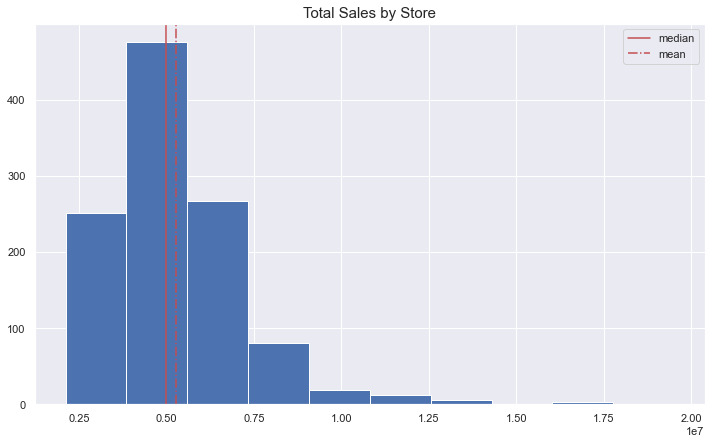

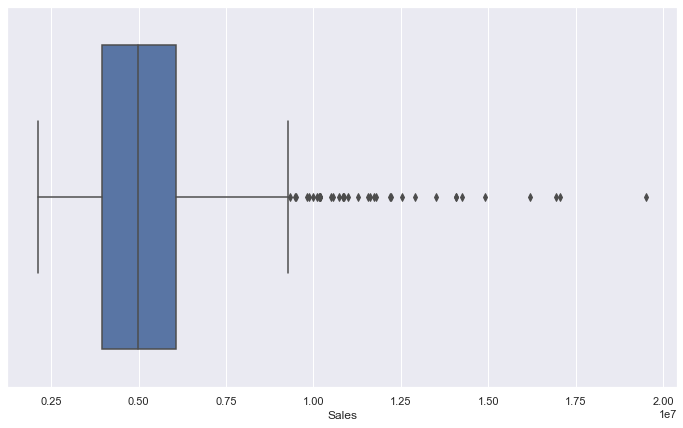

In [30]:
# check distribution of sum up sales over 942 days of 1115 stores
sumsales_by_store.histgram('Sales')

sns.boxplot(x=sumsales_by_store.get_sum_pct().Sales)
plt.show()

In [31]:
# get the sum of sales and share of top 10 stores over 942 day
sumsales_by_store.topN_sum_share(10)

Top 10 Store Total Sales: 153404852.0
Top 10 Store Total Sales Share in All Stores: 2.612%


## Sum up Sales Barplot of Top 10 Stores over 942 Days

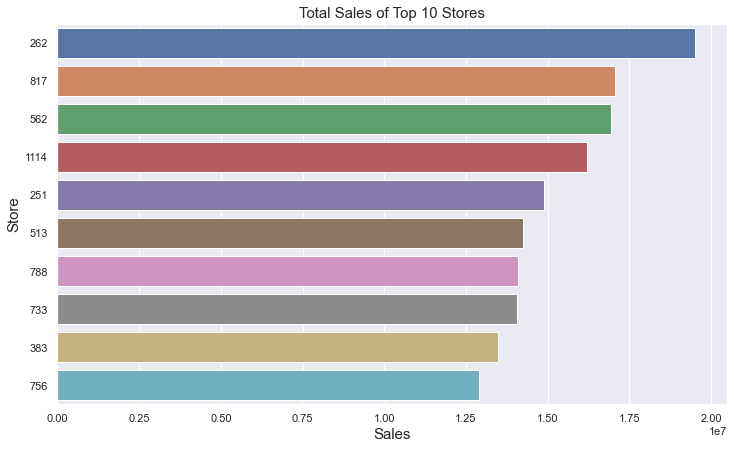

In [32]:
sumsales_by_store.topN_barplot(10)

## Daily Sales Violinplot of Top 10 Stores over 942 Days

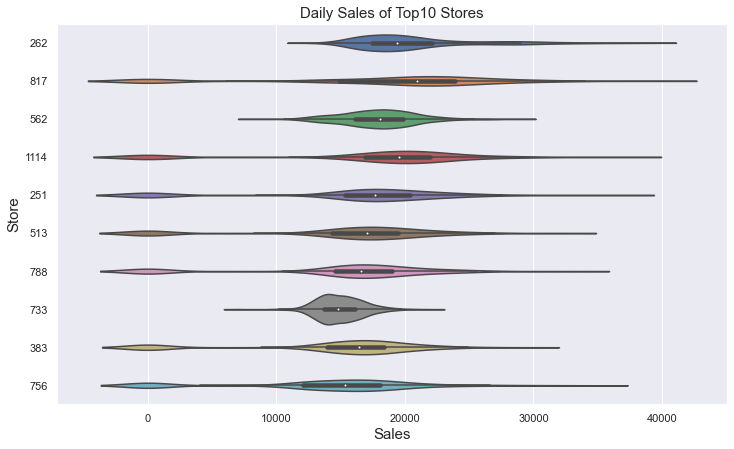

In [33]:
# check daily sales of Top 10 stores 
sales_by_store= Sales_EDA(df)
sales_by_store.topN_daily_violinplot(10)

## Weekly Total Sales

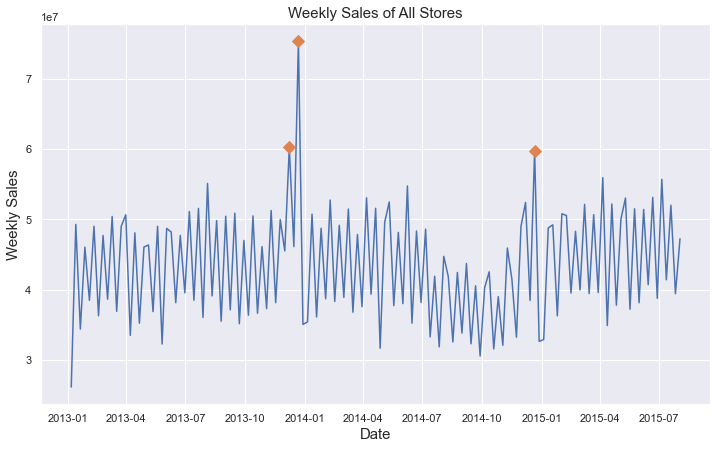

Three peaks happens at: 
 Date
2013-12-22    75371329
2013-12-08    60241244
2014-12-21    59780187
Name: Sales, dtype: int64


In [34]:
markers= df_process.pivot_table('Date', 'sum').resample('w').Sales.sum().nlargest(3)
weeklytotalsales = df_process.pivot_table('Date', 'sum').resample('w').Sales.sum()

plt.figure(figsize=(12, 7))
plt.plot(weeklytotalsales.index, weeklytotalsales.values)
plt.plot(markers.index, markers.values, "D", markersize=8)
plt.title('Weekly Sales of All Stores', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Weekly Sales', fontsize=15)
plt.show()

print(f'Three peaks happens at: \n {markers}')

#### From the weekly sales sum up by all stores, We can see the 3 peaks happens at 12-08 ~ 12-22 week in both 2013 and 2014, which is around christmas season. Therefore we assume this trend also exist in individual store. 

## Plot the number of daily open stores over 942 days

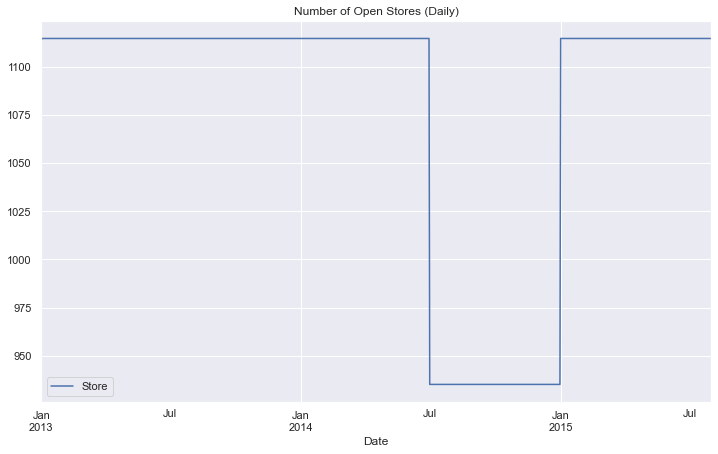

In [35]:
pd.pivot_table(df[['Date', 'Store']], index='Date', aggfunc='count').plot()
plt.title('Number of Open Stores (Daily)')
plt.show()

In [36]:
closedstore = (pd.pivot_table(df[['Date', 'Store']], index='Date', aggfunc='count').max() - pd.pivot_table(df[['Date', 'Store']], index='Date', aggfunc='count').min())[0]
print(f'number of closed store:{closedstore}')

number of closed store:180


#### We can see there's a big decline in sales during 2014-07-01 ~ 2014-12-31 as 180 stores were closed due to refurbishment

## Check Weekly Sales Plot for Top 3 and Bottom 3 Stores

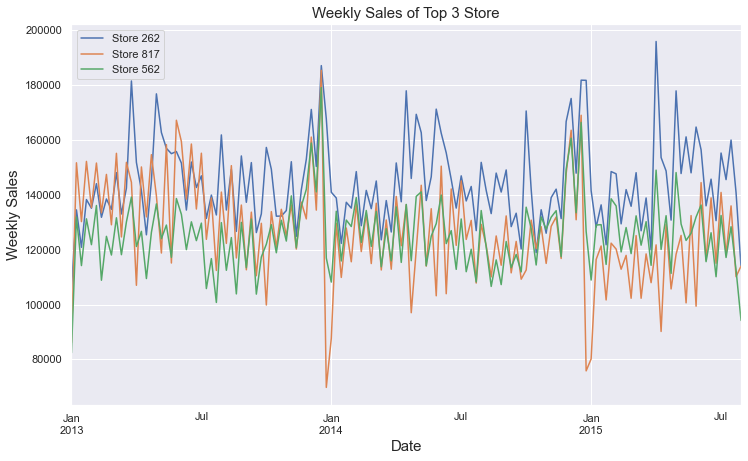

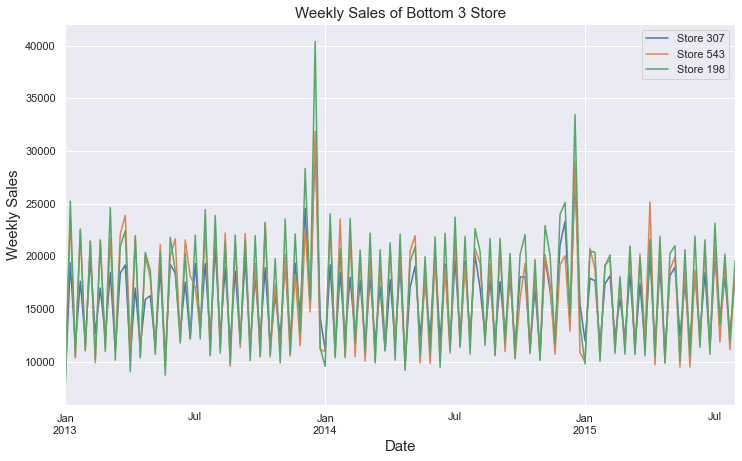

In [37]:
sales_by_store.topN_weekly_salesplot(3)
sales_by_store.bottomN_weekly_salesplot(3)

## Check Weekly Sales Plot for Top 10 and Bottom 10 Stores

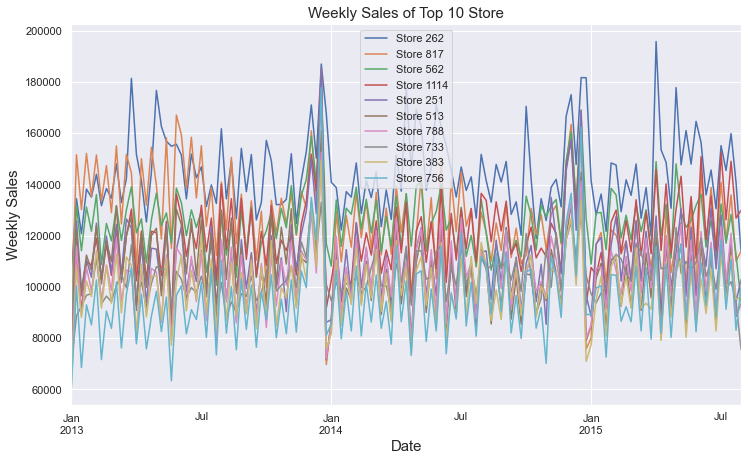

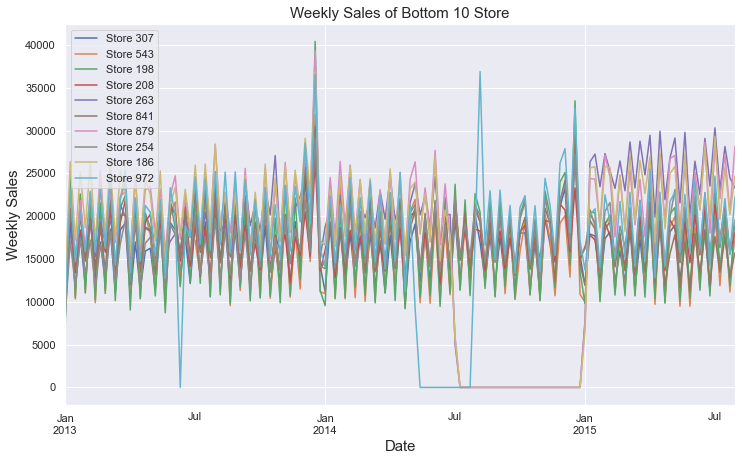

In [38]:
sales_by_store.topN_weekly_salesplot(10)
sales_by_store.bottomN_weekly_salesplot(10)

## Conclusion 1: we can see peak during christmas season is common among most of stores 

### Add 3 new metrics: AverageDailySales, AverageDailyCustomer, SalesPerCustomer 

In [39]:
store_sum = df_process.pivot_table('Store', 'sum')
store_sum['AverageDailySales'] = store_sum['Sales']/store_sum['Open']
store_sum['AverageDailyCustomer'] = store_sum['Customers']/store_sum['Open']
store_sum['SalesPerCustomer'] = store_sum['Sales']/store_sum['Customers']

In [40]:
store_sum.sort_values('Sales', ascending=False)

,Customers,DayOfWeek,Open,Promo,Sales,SchoolHoliday,AverageDailySales,AverageDailyCustomer,SalesPerCustomer
Store,,,,,,,,,
262,3204694,3766,942,360,19516842,169,20718.515924,3402.010616,6.090080
817,2454370,3766,784,360,17057867,173,21757.483418,3130.573980,6.949998
562,2924960,3766,942,360,16927322,209,17969.556263,3105.053079,5.787198
1114,2509542,3766,784,360,16202585,169,20666.562500,3200.946429,6.456391
251,1908934,3766,779,360,14896870,170,19123.068036,2450.492940,7.803764
...,...,...,...,...,...,...,...,...,...
263,221342,3033,622,286,2306075,124,3707.516077,355.855305,10.418606
208,324162,3766,784,360,2302052,173,2936.290816,413.471939,7.101548
198,264690,3766,782,360,2268273,167,2900.604859,338.478261,8.569546


## Average Daily Sales

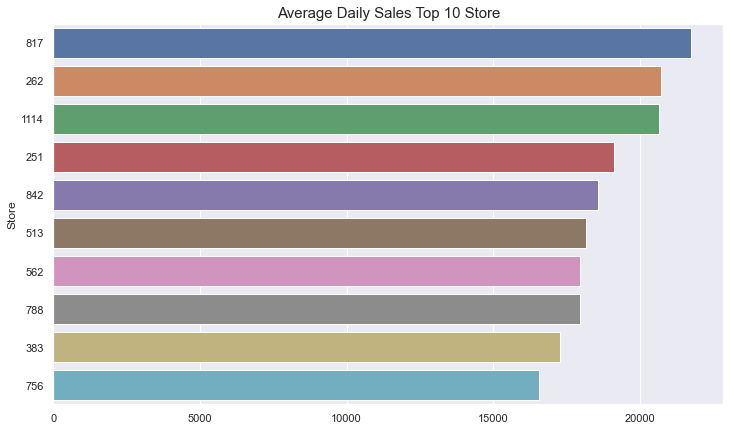

In [41]:
# plot 10 stores with the highest avarege daily sales

sns.barplot(y=store_sum.AverageDailySales.nlargest(10).index,
            x=store_sum.AverageDailySales.nlargest(10).values,
            order = store_sum.AverageDailySales.nlargest(10).index,
           orient='h')

plt.title('Average Daily Sales Top 10 Store', fontsize=15)
plt.xlabel('AverageDailySales', fontsize=15)
plt.ylabel('Store', fontsize=15)
plt.show()

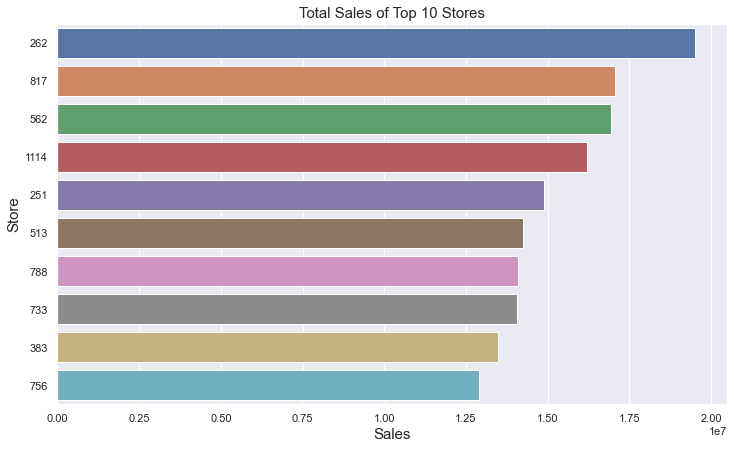

In [42]:
# compare it with plot of 10 highest total sales (sum of 942 days)

sumsales_by_store.topN_barplot(10)

In [43]:
set(sales_by_store.nlargest_ID(10)).difference(set(store_sum.AverageDailySales.nlargest(10).index))

{733}

In [44]:
set(store_sum.AverageDailySales.nlargest(10).index).difference(set(sales_by_store.nlargest_ID(10)))

{842}

We can see the top 10 stores in average daily sales ranking plot are very similar to top 10 stores in total sales ranking, except store 842 replaced store 733 in average daily sales ranking. 

## Average Daily Customers 

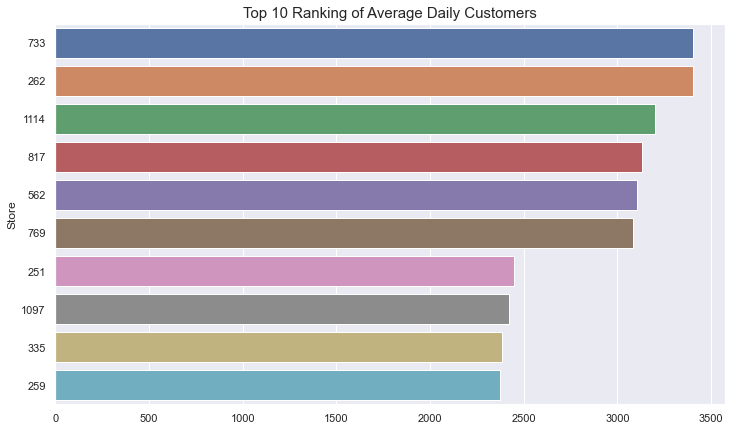

In [45]:
sns.barplot(y=store_sum.AverageDailyCustomer.nlargest(10).index,
            x=store_sum.AverageDailyCustomer.nlargest(10).values,
            order = store_sum.AverageDailyCustomer.nlargest(10).index,
           orient='h')

plt.title('Top 10 Ranking of Average Daily Customers', fontsize=15)
plt.xlabel('AverageDailyCustomer', fontsize=15)
plt.ylabel('Store', fontsize=15)
plt.show()

## Sales Per Customer 

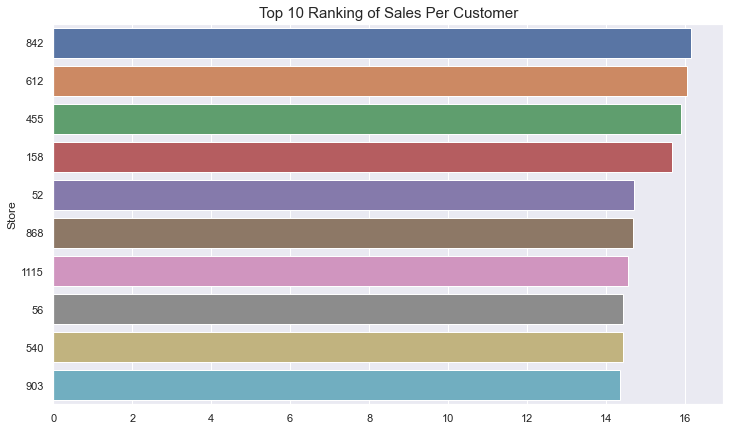

In [46]:
sns.barplot(y=store_sum.SalesPerCustomer.nlargest(10).index,
            x=store_sum.SalesPerCustomer.nlargest(10).values,
            order = store_sum.SalesPerCustomer.nlargest(10).index,
           orient='h')

plt.title('Top 10 Ranking of Sales Per Customer', fontsize=15)
plt.xlabel('SalesPerCustomer', fontsize=15)
plt.ylabel('Store', fontsize=15)
plt.show()

## Combine store_sum dataframe with store.csv

In [47]:
class combined_storedata:
    def __init__(self, data1, data2):
        self.data1 = data1
        self.data2 = pd.read_csv(data2)
    
    def data2_info(self):
        return self.data2
    
    def process_data1(self):
        self.data1 = self.data1.reset_index()
        #self.data1.Store = self.data1.Store.astype('int')
        self.data1 = self.data1.sort_values('Store').reset_index(drop=True)
        return self.data1
    
    def process_data2(self):
        self.data2 = self.data2.drop('Store', axis=1)
        return self.data2
    
    def concatdf(self):
        storedata = pd.concat([self.process_data1(), self.process_data2()],axis=1)
        return storedata                          

In [48]:
class combined_store_EDA:
    def __init__(self,data):
        self.data = data
        
    def storetype_count(self):
        print(self.data.StoreType.value_counts())
    
    def storetype_share_pie(self):
        plt.figure(figsize=(12,7))
        self.data.groupby('StoreType')['Sales'].sum().plot(kind='pie', autopct='%.2f%%')
        plt.title('Sales Share by Store Type', fontsize=15)
        plt.show()
        
    def average_sales_by_storetype(self):
        average_sales_by_storetype = self.data.groupby('StoreType')['Sales'].sum()/self.data.StoreType.value_counts().sort_index()
        sns.barplot(x=average_sales_by_storetype.values, y=average_sales_by_storetype.index, orient='h')
        plt.title('Sales Per Store by Store Type', fontsize=15)
        plt.show()
        
    def assortment_count(self):
        print(self.data.Assortment.value_counts())
    
    def assortment_share_pie(self):
        plt.figure(figsize=(12,7))
        self.data.groupby('Assortment')['Sales'].sum().plot(kind='pie', autopct='%.2f%%')
        plt.title('Sales Share by Assortment Type', fontsize=15)
        plt.show()
        
    def average_sales_by_assortment(self):
        average_sales_by_assortment = self.data.groupby('Assortment')['Sales'].sum()/self.data.Assortment.value_counts().sort_index()
        sns.barplot(x=average_sales_by_assortment.values, y=average_sales_by_assortment.index, orient='h')
        plt.title('Sales Per Store by Assortment Type', fontsize=15)
        plt.show()
        
    def storetype_barplot(self, storetype, col):
        Type = self.data.loc[self.data.StoreType==storetype].set_index('Store')
        sns.barplot(y=Type[col].nlargest(10).index,
                    x=Type[col].nlargest(10).values,
                    order = Type[col].nlargest(10).index,
                   orient='h')

        plt.xlabel(col, fontsize=15)
        plt.ylabel('Store', fontsize=15)
        plt.title(f'Type{storetype.upper()} Store {col} Top 10', fontsize=15)
        plt.show()
        
    def storetype_hist(self, col):
        weight1 = np.ones_like(self.data.loc[self.data.StoreType=='a'][col].index/len(self.data.loc[self.data.StoreType=='a'][col].index))
        weight2 = np.ones_like(self.data.loc[self.data.StoreType=='b'][col].index/len(self.data.loc[self.data.StoreType=='b'][col].index))
        weight3 = np.ones_like(self.data.loc[self.data.StoreType=='c'][col].index/len(self.data.loc[self.data.StoreType=='c'][col].index))
        weight4 = np.ones_like(self.data.loc[self.data.StoreType=='d'][col].index/len(self.data.loc[self.data.StoreType=='d'][col].index))

        self.data.loc[self.data.StoreType=='a'][col].hist(histtype='step', lw=2, weights=weight1)
        self.data.loc[self.data.StoreType=='b'][col].hist(histtype='step', lw=2, weights=weight2)
        self.data.loc[self.data.StoreType=='c'][col].hist(histtype='step', lw=2, weights=weight3)
        self.data.loc[self.data.StoreType=='d'][col].hist(histtype='step', lw=2, weights=weight4)
        plt.xlabel(f'{col}',fontsize=15)
        plt.ylabel('Count',fontsize=15)
        plt.title(f'{col} Distribution by Store Type',fontsize=15)
        plt.legend(['A','B','C', 'D'])
        plt.show()

         
    def assortment_barplot(self, assortment, col):
        Type = self.data.loc[self.data.Assortment==assortment].set_index('Store')
        sns.barplot(y=Type[col].nlargest(10).index,
                    x=Type[col].nlargest(10).values,
                    order = Type[col].nlargest(10).index,
                   orient='h')
        
        plt.xlabel(col,fontsize=15)
        plt.ylabel('Store', fontsize=15)
        plt.title(f'Assortment {assortment.upper()}  {col} Top 10', fontsize=15)
        plt.show()
        
    def assortment_hist(self, col):
        weight1 = np.ones_like(self.data.loc[self.data.Assortment=='a'][col].index/len(self.data.loc[self.data.Assortment=='a'][col].index))
        weight2 = np.ones_like(self.data.loc[self.data.Assortment=='b'][col].index/len(self.data.loc[self.data.Assortment=='b'][col].index))
        weight3 = np.ones_like(self.data.loc[self.data.Assortment=='c'][col].index/len(self.data.loc[self.data.Assortment=='c'][col].index))
        self.data.loc[self.data.Assortment=='a'][col].hist(histtype='step', lw=2, weights=weight1)
        self.data.loc[self.data.Assortment=='b'][col].hist(histtype='step', lw=2, weights=weight2)
        self.data.loc[self.data.Assortment=='c'][col].hist(histtype='step', lw=2, weights=weight3)
        plt.xlabel(f'{col}',fontsize=15)
        plt.ylabel('Count',fontsize=15)
        plt.title(f'Store {col} Distribution by Assortment Type',fontsize=15)
        plt.legend(['A','B','C'])
        plt.show()
        
    def type_violinplot(self, col, typecol):
        plt.figure(figsize=(12, 7))
        sns.violinplot(x=col, y=typecol, 
                   data=self.data, order= sorted(set(self.data[typecol])),
                  orient='h')
        plt.title(f'{col} by {typecol}', fontsize=15)
        plt.xlabel(f'{col}', fontsize=15)
        plt.ylabel(f'{typecol}', fontsize=15)
        plt.show()
        
    def type_summary(self, typecol, col):
        return self.data.groupby(typecol)[col].describe().T
    

## Combine store_sum dataframe with store.csv

In [49]:
# call class
combine = combined_storedata(store_sum, 'store.csv')

In [50]:
# check the detail of store.csv 
combine.data2_info()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Combine store_sum and store.csv

In [51]:
newstoredata = combine.concatdf()

In [52]:
newstoredata

,Store,Customers,DayOfWeek,Open,Promo,Sales,SchoolHoliday,AverageDailySales,AverageDailyCustomer,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,440523,3766,781,360,3716854,193,4759.096031,564.049936,8.437366,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,457855,3766,784,360,3883858,167,4953.900510,583.998724,8.482725,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,584310,3766,779,360,5408261,170,6942.568678,750.077022,9.255808,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,1036254,3766,784,360,7556507,173,9638.401786,1321.752551,7.292138,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,418588,3766,779,360,3642818,172,4676.274711,537.340180,8.702634,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,351883,3766,779,360,4091076,170,5251.702182,451.711168,11.626239,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,653276,3766,779,360,7974294,170,10236.577664,838.608472,12.206623,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,562151,3766,784,360,5196242,159,6627.859694,717.029337,9.243499,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,2509542,3766,784,360,16202585,169,20666.562500,3200.946429,6.456391,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Sales by Store Type 


In [53]:
newstoredata_eda = combined_store_EDA(newstoredata)

In [54]:
# Store type counts
newstoredata_eda.storetype_count()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64


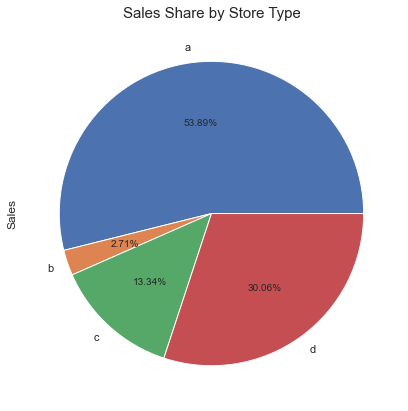

In [55]:
# Total sales share by store type
newstoredata_eda.storetype_share_pie()

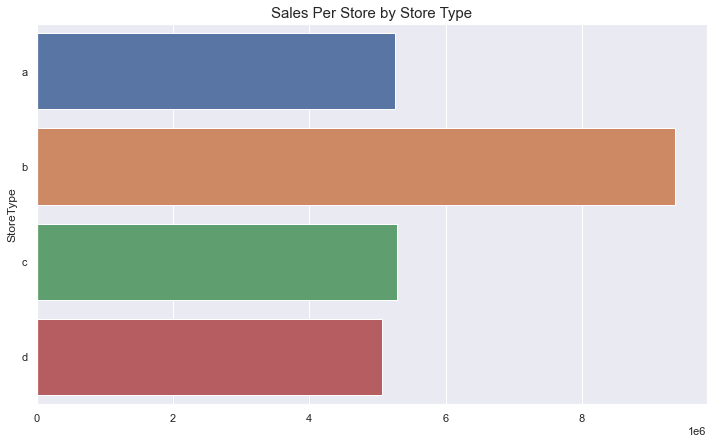

In [56]:
newstoredata_eda.average_sales_by_storetype()

In [57]:
# Sales summary by store type
newstoredata_eda.type_summary('StoreType', 'Sales')

StoreType,a,b,c,d
count,6.020000e+02,1.700000e+01,1.480000e+02,3.480000e+02
mean,5.258031e+06,9.366553e+06,5.292037e+06,5.072968e+06
std,2.046586e+06,4.484603e+06,1.736892e+06,1.379296e+06
min,2.114322e+06,3.794012e+06,2.179287e+06,2.340576e+06
25%,3.838955e+06,6.437314e+06,4.080832e+06,4.026226e+06
50%,4.906032e+06,9.179413e+06,5.127592e+06,4.945824e+06
75%,6.135292e+06,1.085187e+07,6.237014e+06,5.821132e+06
max,1.705787e+07,1.951684e+07,1.217600e+07,1.155352e+07


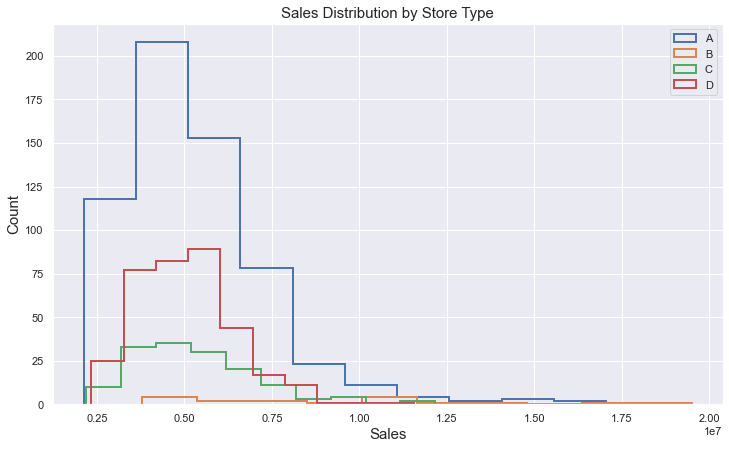

In [58]:
# Total sales distribution by store type
newstoredata_eda.storetype_hist('Sales')

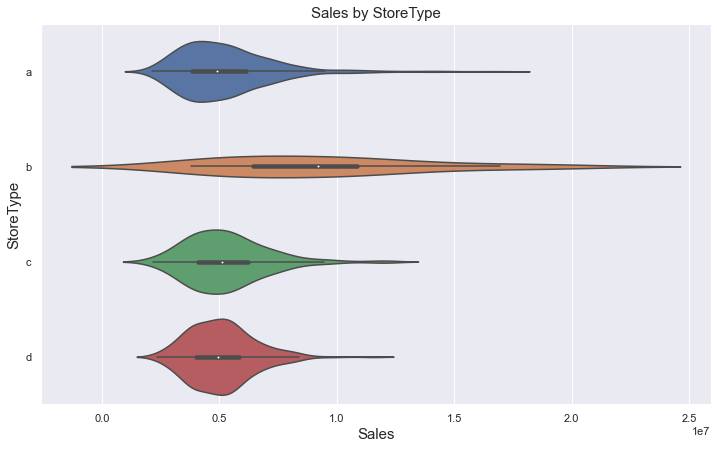

In [59]:
newstoredata_eda.type_violinplot('Sales', 'StoreType')

In [60]:
# Average Daily sales distribution by store type
newstoredata_eda.type_summary('StoreType', 'AverageDailySales')

StoreType,a,b,c,d
count,602.000000,17.000000,148.000000,348.000000
mean,6912.542955,10110.779605,6917.199267,6823.743727
std,2587.428205,4593.997196,2173.694246,1779.628297
min,2703.736573,4070.828326,2790.380282,3005.983312
25%,5091.751317,6936.760776,5351.053715,5534.711359
50%,6481.216945,9744.599788,6645.840010,6695.215430
75%,7974.122165,11643.638412,8063.268787,7774.570026
max,21757.483418,20718.515924,15530.605867,18574.795820


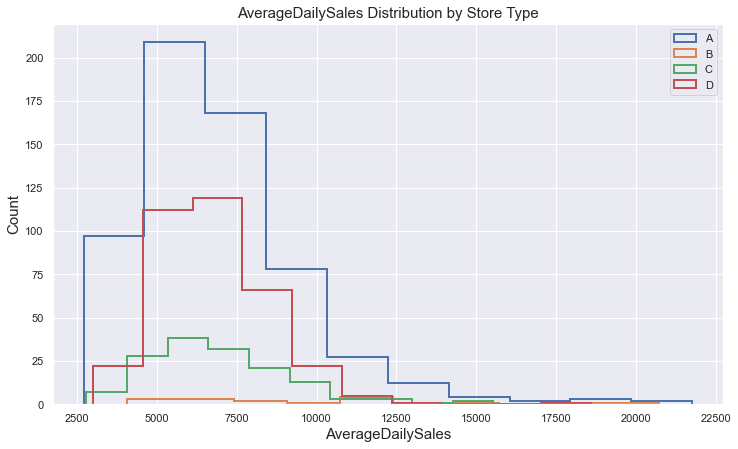

In [61]:
newstoredata_eda.storetype_hist('AverageDailySales')

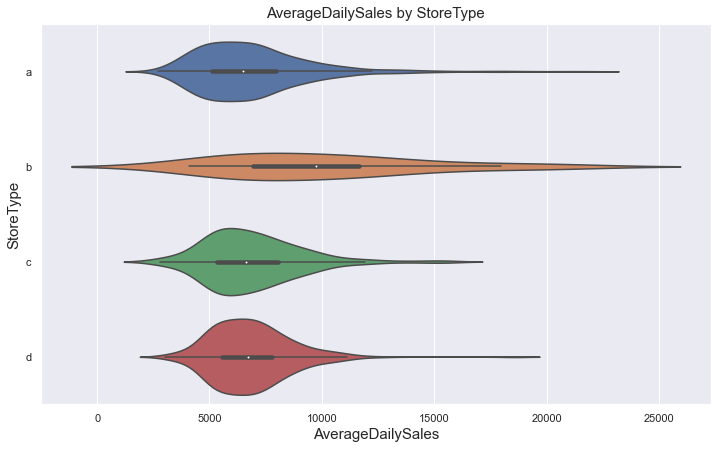

In [62]:
newstoredata_eda.type_violinplot('AverageDailySales', 'StoreType')

## Customer by Store Type

In [63]:
# customer summary by store type
newstoredata_eda.type_summary('StoreType', 'Customers')

StoreType,a,b,c,d
count,6.020000e+02,1.700000e+01,1.480000e+02,348.000000
mean,6.038894e+05,1.850919e+06,6.224980e+05,450876.422414
std,2.724725e+05,8.405047e+05,2.280745e+05,131064.336681
min,1.957150e+05,7.094440e+05,1.875830e+05,201507.000000
25%,4.284670e+05,1.016989e+06,4.553350e+05,357703.250000
50%,5.496265e+05,1.656830e+06,5.861535e+05,434423.500000
75%,7.095602e+05,2.280508e+06,7.554540e+05,533722.000000
max,2.509542e+06,3.206058e+06,1.397803e+06,968524.000000


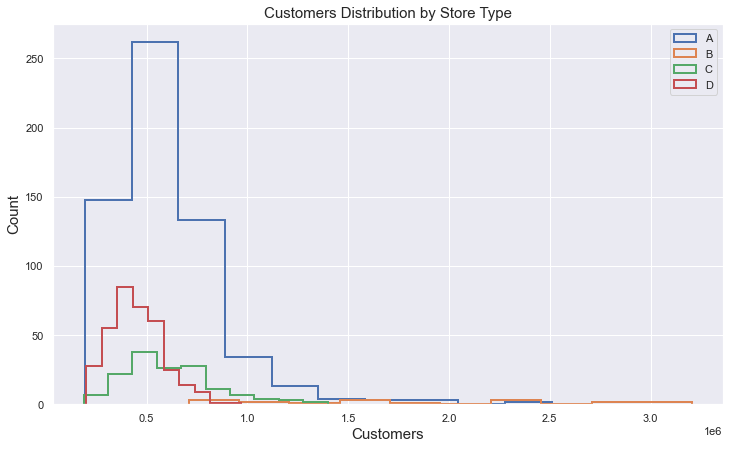

In [64]:
# Total customer distribution by store type
newstoredata_eda.storetype_hist('Customers')

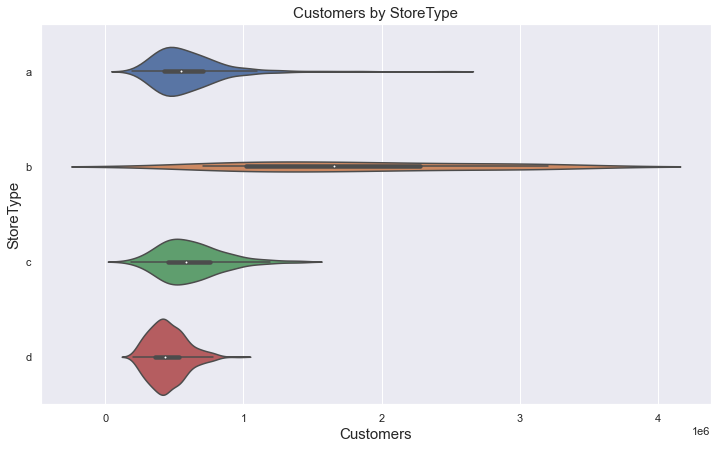

In [65]:
newstoredata_eda.type_violinplot('Customers', 'StoreType')

In [66]:
# Average Daily customer summary
newstoredata_eda.type_summary('StoreType', 'AverageDailyCustomer')

StoreType,a,b,c,d
count,602.000000,17.000000,148.000000,348.000000
mean,792.128598,1998.676212,812.001622,604.205962
std,343.826147,859.195827,285.093586,158.886108
min,307.805627,937.178336,240.183099,258.673941
25%,568.127448,1287.971812,614.444701,488.851552
50%,715.845026,1758.842887,759.482781,586.163265
75%,917.509090,2420.921444,967.063348,696.756171
max,3200.946429,3403.458599,1782.911990,1240.107554


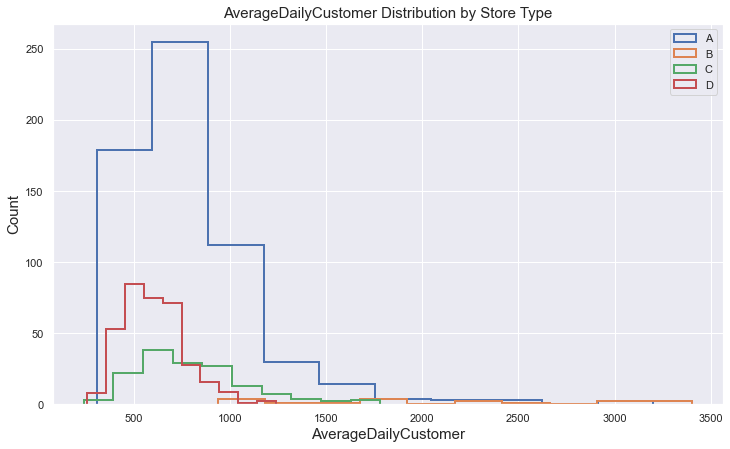

In [67]:
newstoredata_eda.storetype_hist('AverageDailyCustomer')

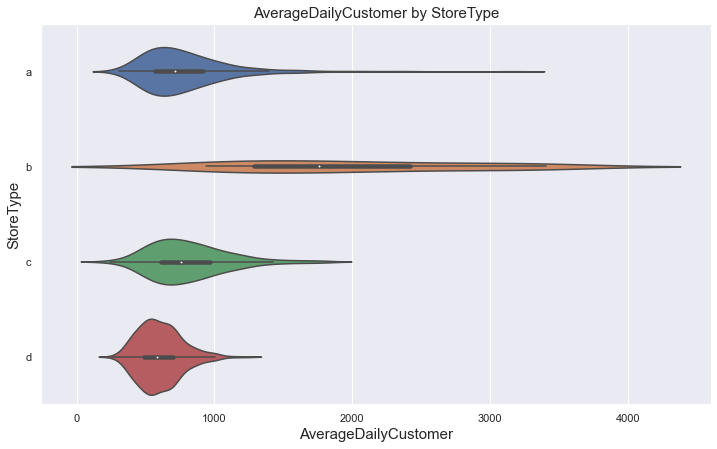

In [68]:
newstoredata_eda.type_violinplot('AverageDailyCustomer','StoreType')

## Sales Per Customer by Store Type

In [69]:
newstoredata_eda.type_summary('StoreType', 'SalesPerCustomer')

StoreType,a,b,c,d
count,602.000000,17.000000,148.000000,348.000000
mean,8.958480,5.168023,8.737413,11.433302
std,1.467117,1.174245,1.399375,1.641336
min,5.847553,3.513703,5.583326,6.576090
25%,7.881745,4.100593,7.787305,10.274640
50%,8.814441,4.908172,8.460005,11.472793
75%,9.902678,6.090080,9.730982,12.568605
max,13.431507,7.162148,12.262507,16.162639


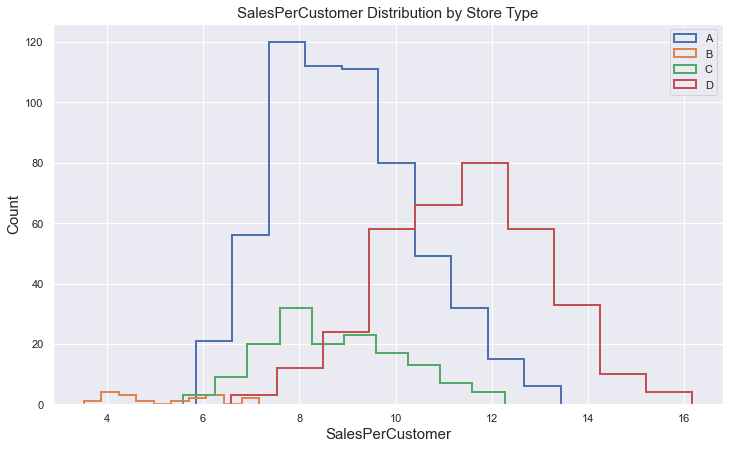

In [70]:
# Sales per customer distribution by store type
newstoredata_eda.storetype_hist('SalesPerCustomer')

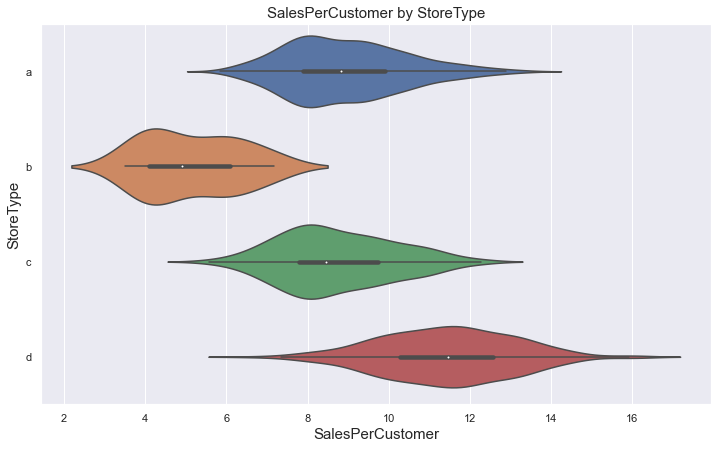

In [71]:
newstoredata_eda.type_violinplot('SalesPerCustomer', 'StoreType')

In [72]:
#df.loc[(df.Store==817)&(df.StateHoliday!=0)]

In [73]:
#df.loc[(df.Store==817)&(df.StateHoliday==0)]

## Open Days by Store Type

In [74]:
newstoredata_eda.type_summary('StoreType', 'Open')

StoreType,a,b,c,d
count,602.000000,17.000000,148.000000,348.000000
mean,759.264120,915.470588,763.364865,743.603448
std,57.974362,62.330889,47.957202,68.423694
min,597.000000,745.000000,592.000000,606.000000
25%,776.000000,931.000000,777.000000,769.750000
50%,779.000000,942.000000,780.000000,779.000000
75%,782.000000,942.000000,784.000000,781.000000
max,906.000000,942.000000,784.000000,901.000000


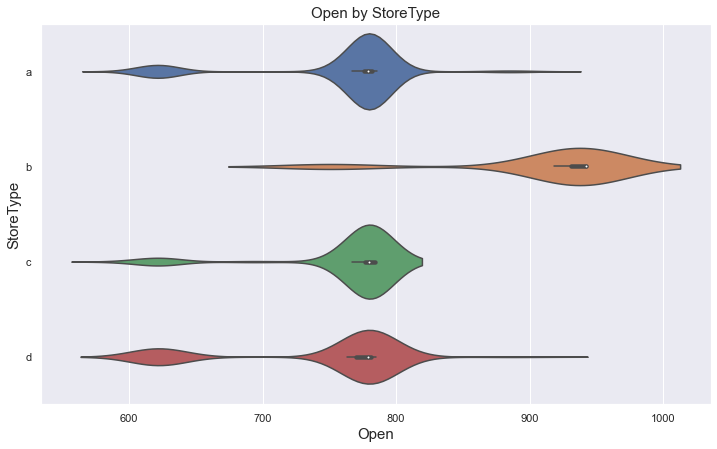

In [75]:
# Total open days by store type
newstoredata_eda.type_violinplot('Open','StoreType')

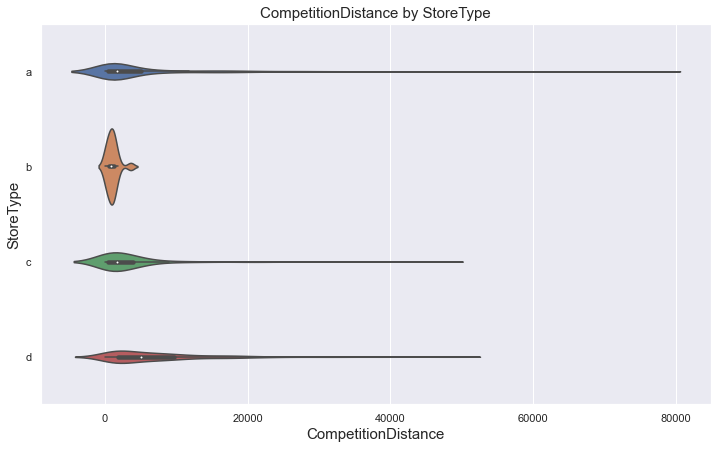

In [127]:
newstoredata_eda.type_violinplot('CompetitionDistance','StoreType')

## Break Down Analysis of Each Store Type 

### Type A

In [78]:
sumsales_by_storeTypeA = sumby(newstoredata.loc[newstoredata.StoreType=='a'], 'Store', 'Sales')

In [79]:
# Top 10 stores share in all TypeA stores 
sumsales_by_storeTypeA.topN_sum_share(10)

A Type Store Top 10 Store Total Sales: 138468419.0
A Type Store Top 10 Store Total Sales Share: 4.375%


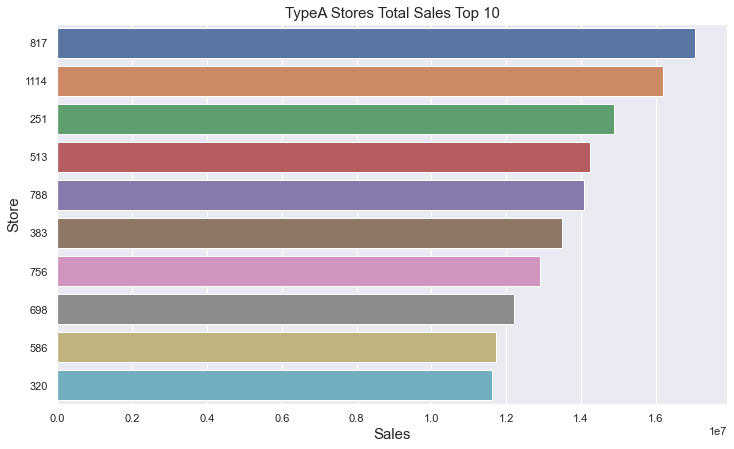

In [80]:
sumsales_by_storeTypeA.topN_barplot(10)
plt.title('TypeA Stores Total Sales Top 10', fontsize=15)
plt.show()

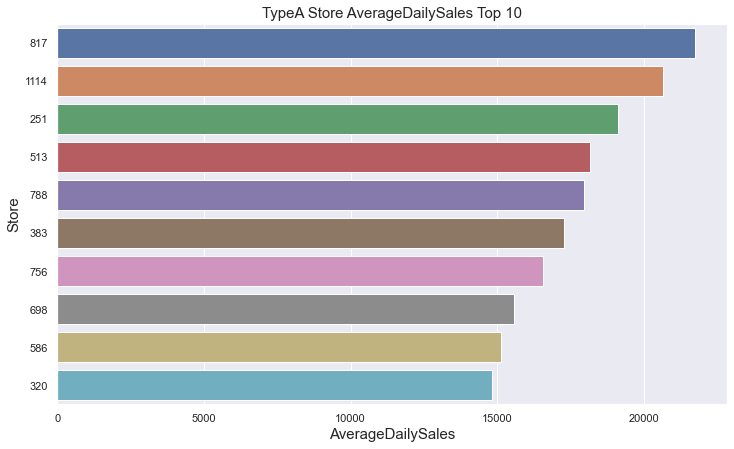

In [81]:
newstoredata_eda.storetype_barplot('a', 'AverageDailySales')

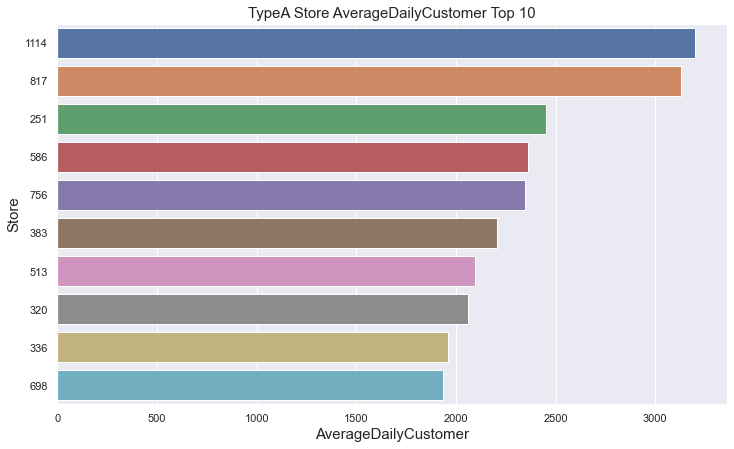

In [82]:
newstoredata_eda.storetype_barplot('a', 'AverageDailyCustomer')

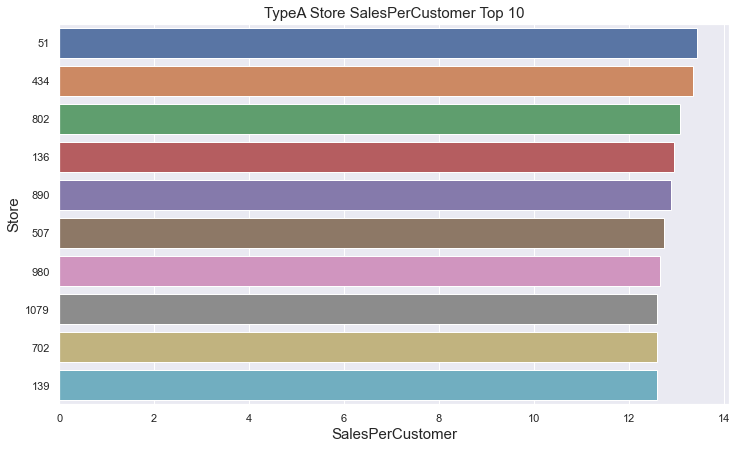

In [83]:
newstoredata_eda.storetype_barplot('a', 'SalesPerCustomer')

### Type B

In [84]:
sumsales_by_storeTypeB = sumby(newstoredata.loc[newstoredata.StoreType=='b'], 'Store', 'Sales')

In [85]:
# Top 10 stores share in all TypeB stores 
sumsales_by_storeTypeB.topN_sum_share(10)

B Type Store Top 10 Store Total Sales: 121245709.0
B Type Store Top 10 Store Total Sales Share: 76.144%


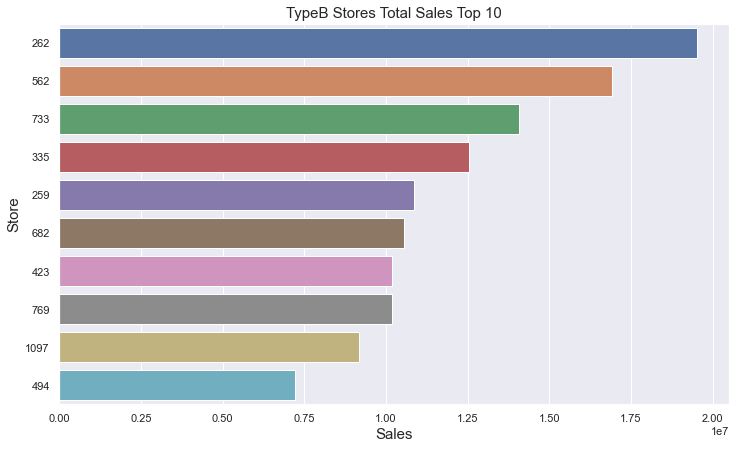

In [86]:
sumsales_by_storeTypeB.topN_barplot(10)
plt.title('TypeB Stores Total Sales Top 10', fontsize=15)
plt.show()

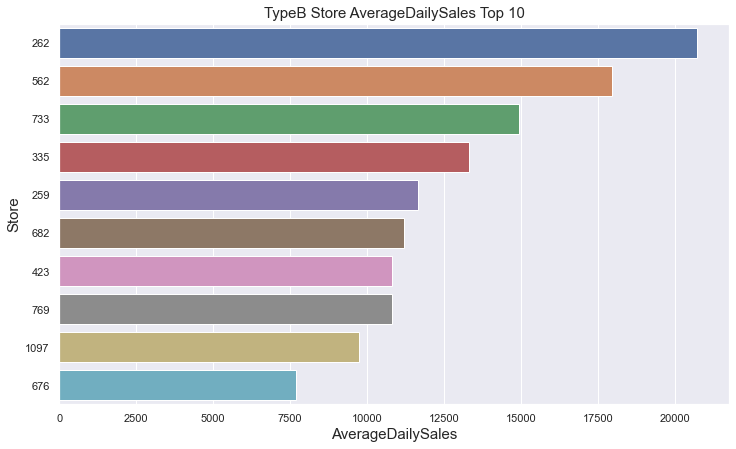

In [87]:
newstoredata_eda.storetype_barplot('b', 'AverageDailySales')

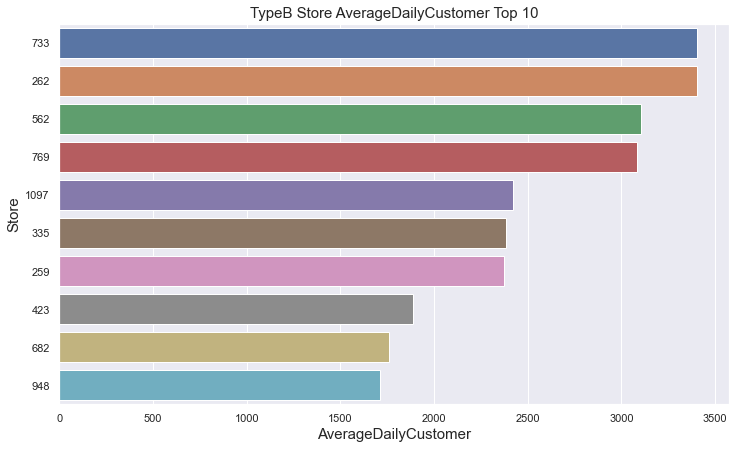

In [88]:
newstoredata_eda.storetype_barplot('b', 'AverageDailyCustomer')

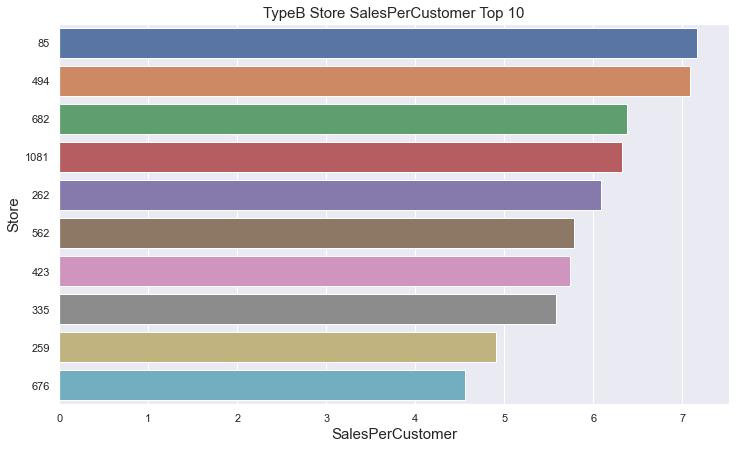

In [89]:
newstoredata_eda.storetype_barplot('b', 'SalesPerCustomer')

### C Type

In [90]:
sumsales_by_storeTypeC = sumby(newstoredata.loc[newstoredata.StoreType=='c'], 'Store', 'Sales')

In [91]:
# Top 10 stores share in all TypeC stores 
sumsales_by_storeTypeC.topN_sum_share(10)

C Type Store Top 10 Store Total Sales: 95023554.0
C Type Store Top 10 Store Total Sales Share: 12.132%


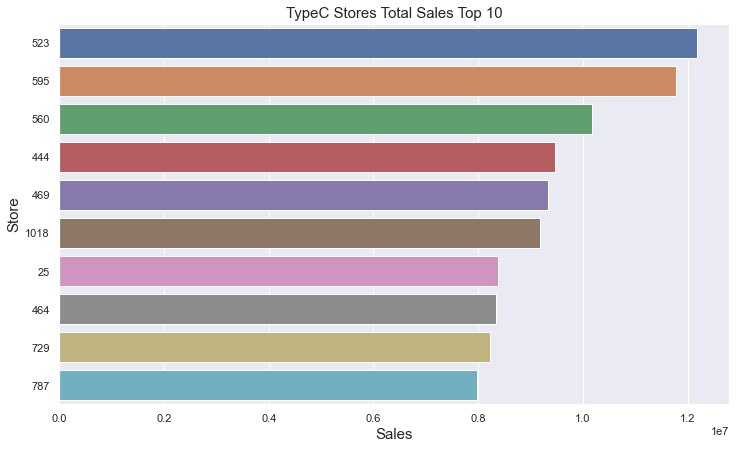

In [92]:
sumsales_by_storeTypeC.topN_barplot(10)
plt.title('TypeC Stores Total Sales Top 10', fontsize=15)
plt.show()

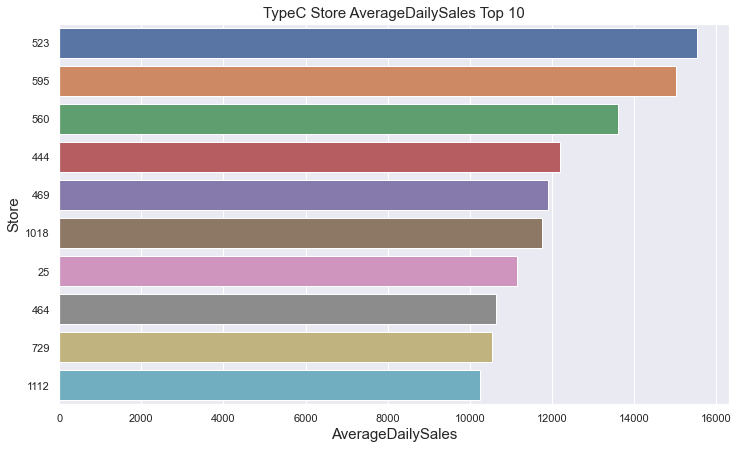

In [93]:
newstoredata_eda.storetype_barplot('c', 'AverageDailySales')

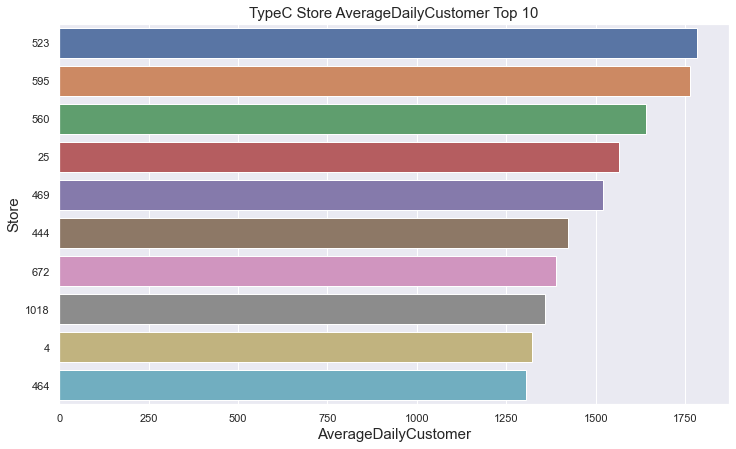

In [94]:
newstoredata_eda.storetype_barplot('c', 'AverageDailyCustomer')

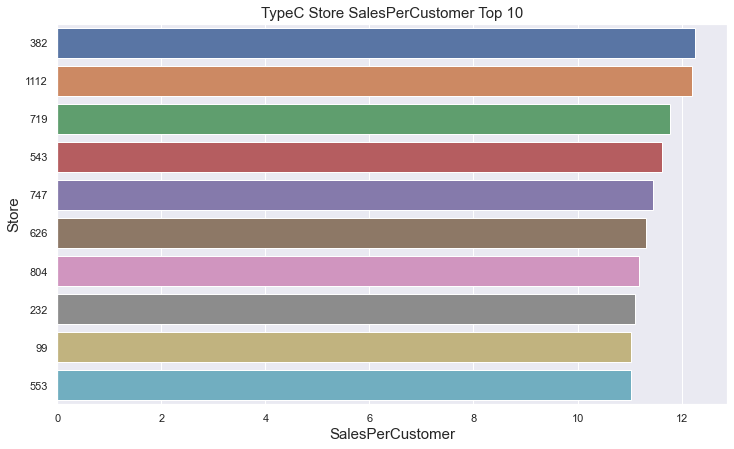

In [95]:
newstoredata_eda.storetype_barplot('c', 'SalesPerCustomer')

### D Type

In [96]:
sumsales_by_storeTypeD = sumby(newstoredata.loc[newstoredata.StoreType=='d'], 'Store', 'Sales')

In [97]:
# Top 10 stores share in all TypeD stores 
sumsales_by_storeTypeD.topN_sum_share(10)

D Type Store Top 10 Store Total Sales: 88427931.0
D Type Store Top 10 Store Total Sales Share: 5.009%


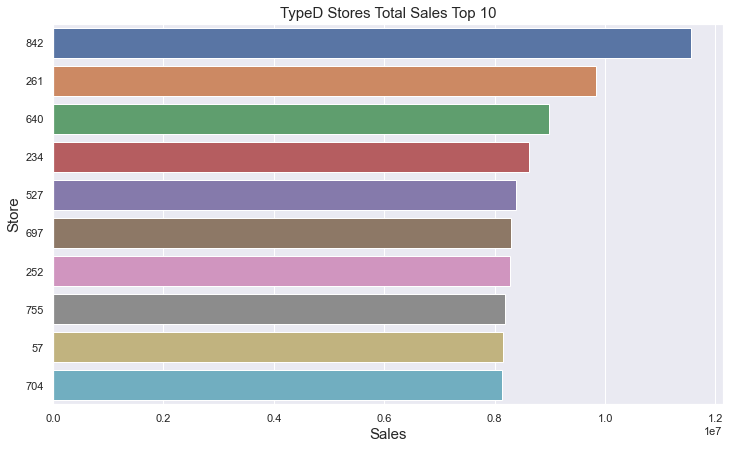

In [98]:
sumsales_by_storeTypeD.topN_barplot(10)
plt.title('TypeD Stores Total Sales Top 10', fontsize=15)
plt.show()

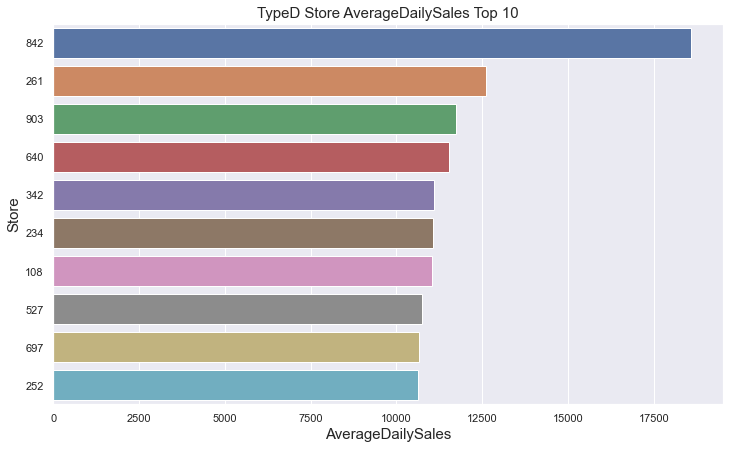

In [99]:
newstoredata_eda.storetype_barplot('d', 'AverageDailySales')

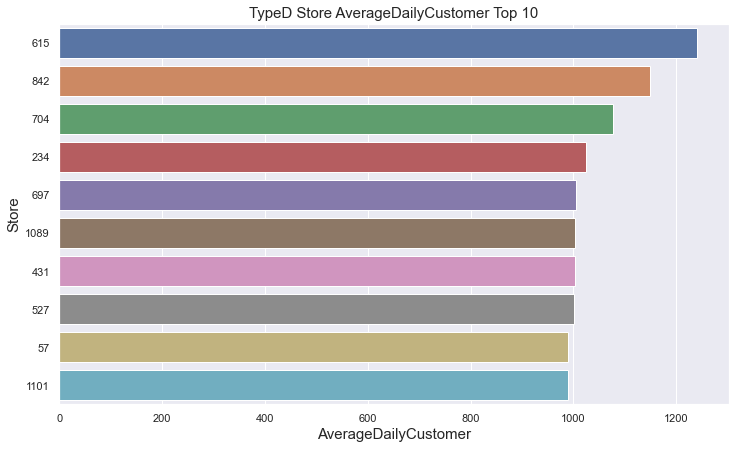

In [100]:
newstoredata_eda.storetype_barplot('d', 'AverageDailyCustomer')

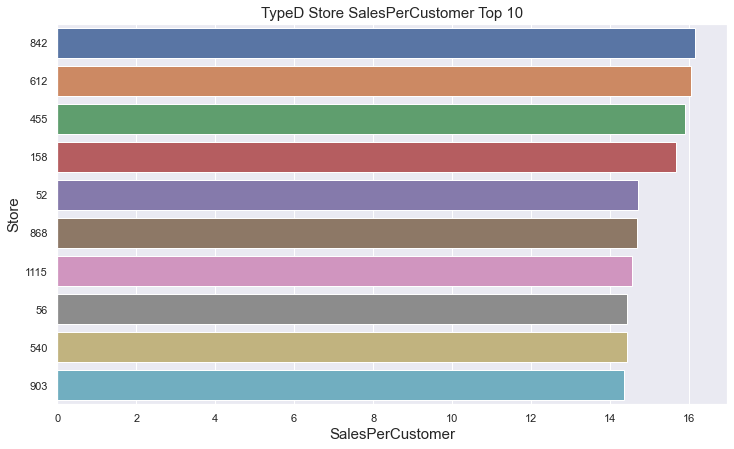

In [101]:
newstoredata_eda.storetype_barplot('d', 'SalesPerCustomer')

## Assortment Type 
a = basic, b = extra, c = extended

In [102]:
# store counts by assortment type
newstoredata_eda.assortment_count()

a    593
c    513
b      9
Name: Assortment, dtype: int64


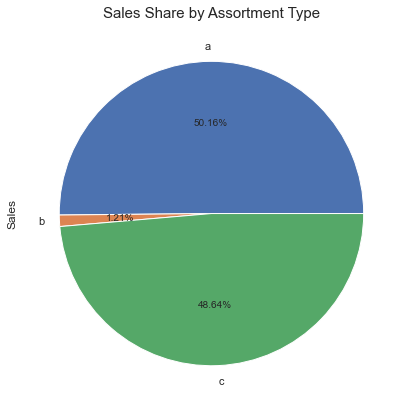

In [103]:
newstoredata_eda.assortment_share_pie()

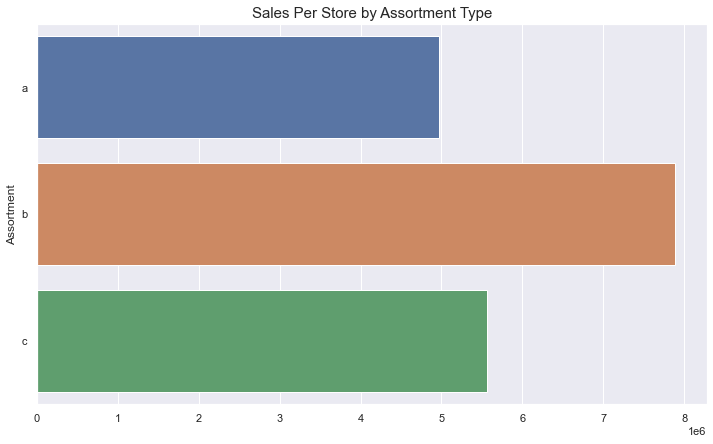

In [104]:
newstoredata_eda.average_sales_by_assortment()

In [105]:
# Sales summary by assortment type
newstoredata_eda.type_summary('Assortment', 'Sales')

Assortment,a,b,c
count,5.930000e+02,9.000000e+00,5.130000e+02
mean,4.967538e+06,7.882924e+06,5.568195e+06
std,1.852836e+06,3.441663e+06,1.953188e+06
min,2.114322e+06,3.794012e+06,2.306075e+06
25%,3.746964e+06,5.255773e+06,4.302026e+06
50%,4.630070e+06,7.057092e+06,5.334682e+06
75%,5.719235e+06,1.019800e+07,6.397583e+06
max,1.951684e+07,1.406716e+07,1.692732e+07


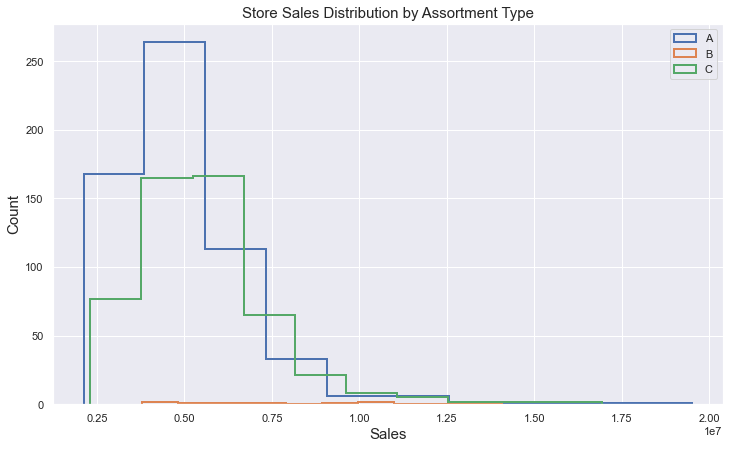

In [106]:
# Total sales distribution by assortment type
newstoredata_eda.assortment_hist('Sales')

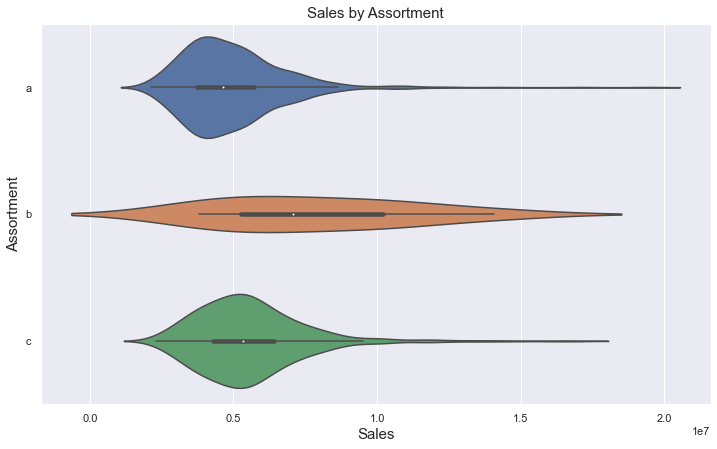

In [107]:
newstoredata_eda.type_violinplot('Sales', 'Assortment')

In [108]:
# Average Daily sales distribution by assotment type
newstoredata_eda.type_summary('Assortment', 'AverageDailySales')

Assortment,a,b,c
count,593.000000,9.000000,513.000000
mean,6596.822481,8555.417729,7295.765945
std,2233.568122,3500.106060,2469.062206
min,2703.736573,4070.828326,3083.812821
25%,5084.703466,5645.298604,5708.806410
50%,6250.410256,7687.464052,6906.443590
75%,7567.233418,10825.902335,8338.826923
max,21757.483418,14933.288747,20666.562500


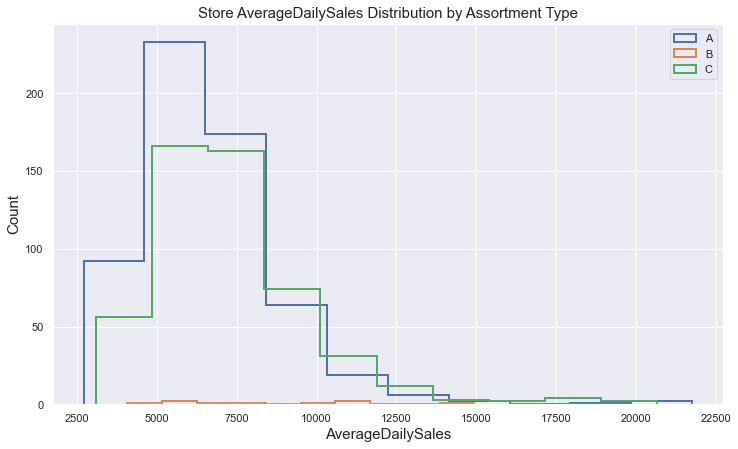

In [109]:
# Average daily sales distribution by assortment type
newstoredata_eda.assortment_hist('AverageDailySales')

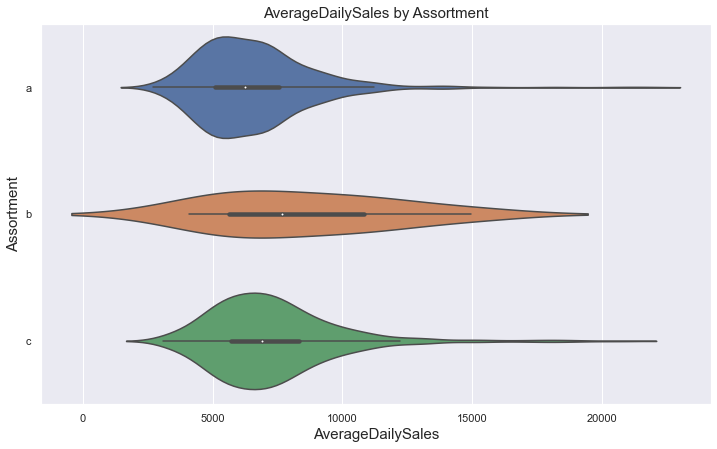

In [110]:
newstoredata_eda.type_violinplot('AverageDailySales', 'Assortment')

## Customer by Assortment Type

In [111]:
# customer summary by assortment type
newstoredata_eda.type_summary('Assortment', 'Customers')

Assortment,a,b,c
count,5.930000e+02,9.000000e+00,5.130000e+02
mean,5.611584e+05,1.885836e+06,5.736887e+05
std,2.741280e+05,8.145205e+05,2.725375e+05
min,1.875830e+05,9.252350e+05,2.213420e+05
25%,3.946290e+05,1.349510e+06,4.162150e+05
50%,5.013180e+05,1.589133e+06,5.201070e+05
75%,6.680160e+05,2.280508e+06,6.560740e+05
max,3.204694e+06,3.206058e+06,2.924960e+06


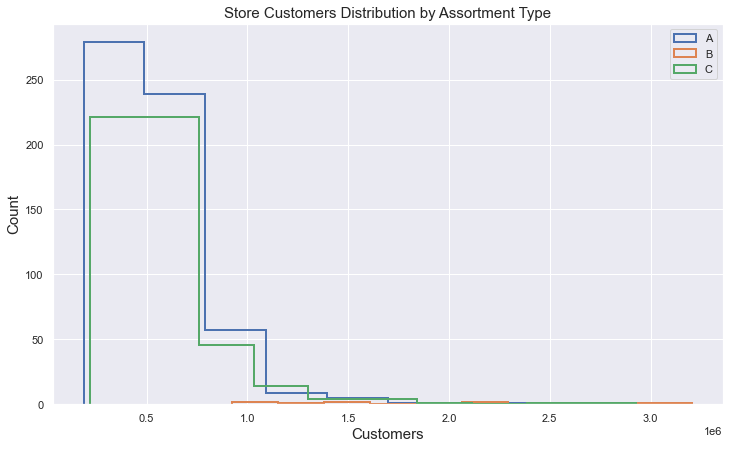

In [112]:
# Total customer distribution by assortment type
newstoredata_eda.assortment_hist('Customers')

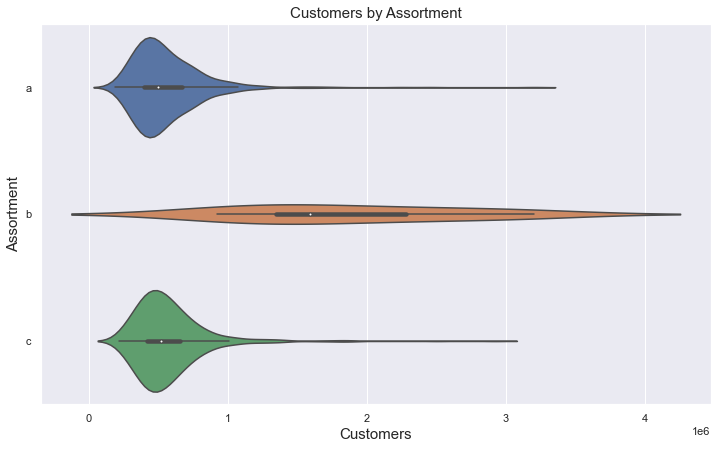

In [113]:
newstoredata_eda.type_violinplot('Customers', 'Assortment')

In [114]:
# Average Daily customer summary by assortment type
newstoredata_eda.type_summary('Assortment', 'AverageDailyCustomer')

Assortment,a,b,c
count,593.000000,9.000000,513.000000
mean,740.804119,2045.332255,747.707590
std,322.748593,824.660780,333.210938
min,240.183099,992.741416,303.835509
25%,536.750963,1449.527390,544.337179
50%,668.789727,1712.427802,682.359795
75%,866.699742,2420.921444,848.106547
max,3402.010616,3403.458599,3200.946429


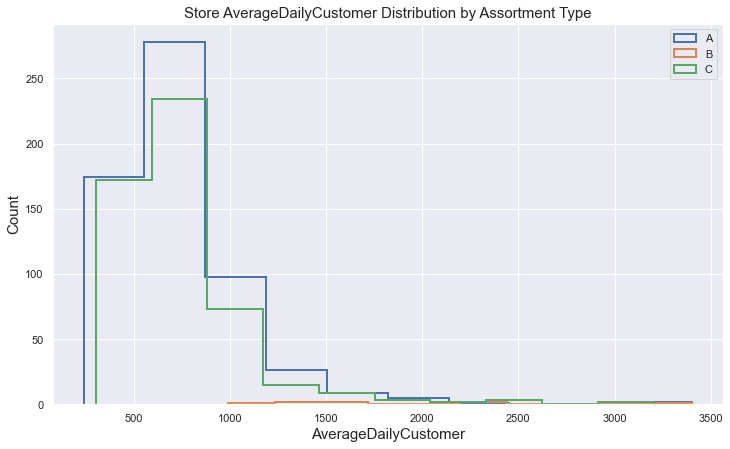

In [115]:
newstoredata_eda.assortment_hist('AverageDailyCustomer')

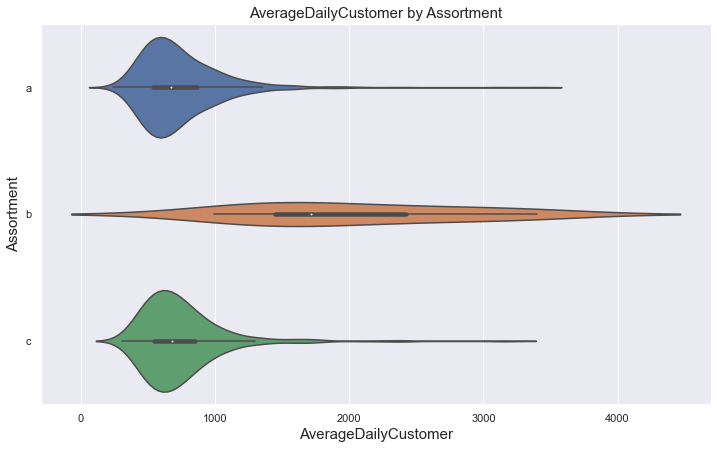

In [116]:
newstoredata_eda.type_violinplot('AverageDailyCustomer','Assortment')

## Sales Per Customer by Assortment Type

In [117]:
# Sales per customer summary by assortment type
newstoredata_eda.type_summary('Assortment', 'SalesPerCustomer')

Assortment,a,b,c
count,593.000000,9.000000,513.000000
mean,9.276413,4.190534,10.164054
std,1.771222,0.402391,2.002228
min,5.581704,3.513703,5.787198
25%,7.923745,4.025161,8.523471
50%,9.076400,4.100593,10.051935
75%,10.480735,4.387680,11.563495
max,14.142670,4.908172,16.162639


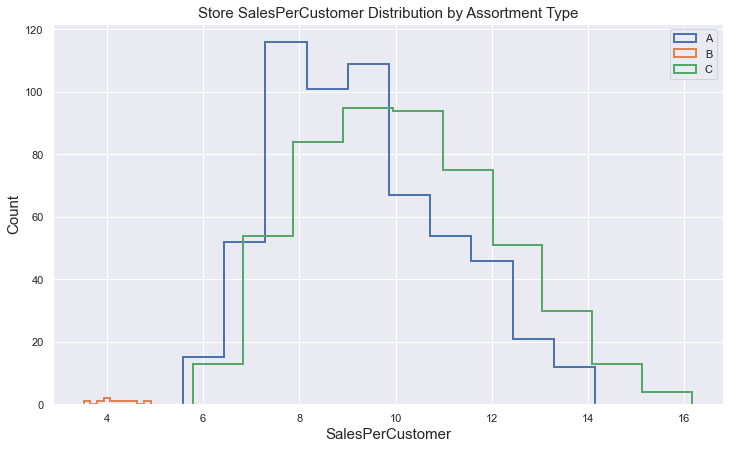

In [118]:
# Sales per customer distribution by assortment type
newstoredata_eda.assortment_hist('SalesPerCustomer')

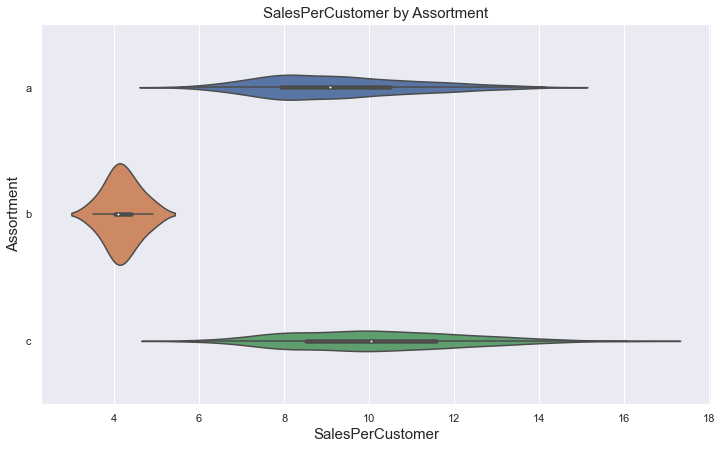

In [119]:
newstoredata_eda.type_violinplot('SalesPerCustomer', 'Assortment')

## Open Days by Assortment Type

In [120]:
# open days summary by assortment type
newstoredata_eda.type_summary('Assortment', 'Open')

Assortment,a,b,c
count,593.000000,9.000000,513.000000
mean,750.268128,912.444444,762.711501
std,65.962448,63.285289,57.185473
min,592.000000,745.000000,607.000000
25%,772.000000,928.000000,777.000000
50%,779.000000,932.000000,779.000000
75%,781.000000,942.000000,784.000000
max,942.000000,942.000000,942.000000


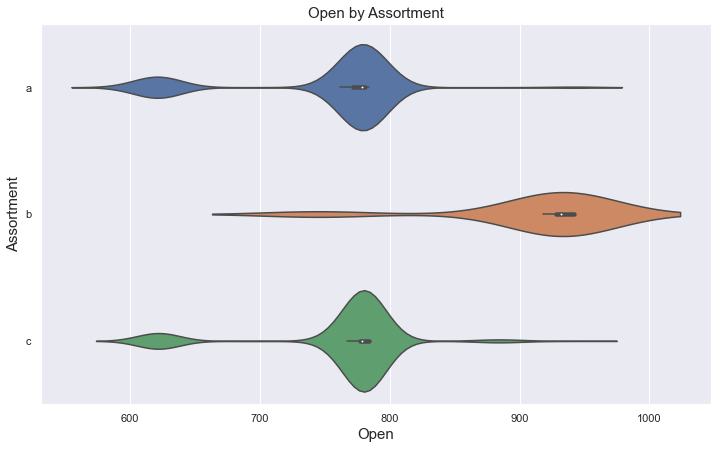

In [121]:
# Total open days by assorment type
newstoredata_eda.type_violinplot('Open','Assortment')

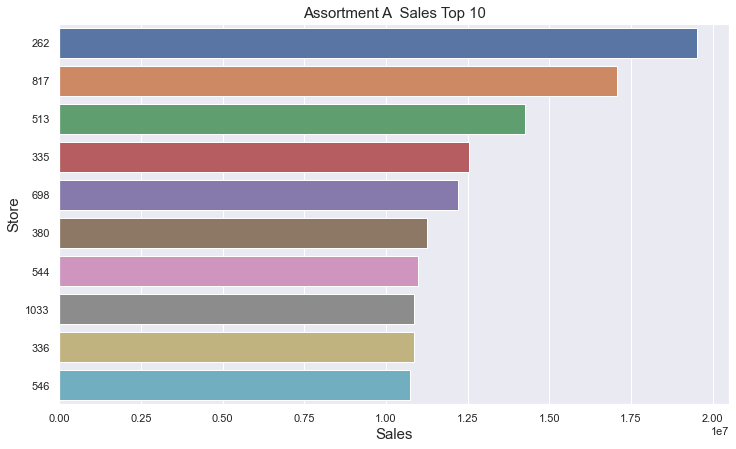

In [122]:
newstoredata_eda.assortment_barplot('a', 'Sales')

## Individual Store EDA

In [123]:
storeanalyze817= individual_store(df, 'Date', 817)

storeanalyze817.store_report()

,Detail
Storeid,817
Store Type,A
Assortment,A
Open Days,784
Closed Days,158
Total Sales,1.70579e+07
Share in All Store (%),0.29
Share in A Type (%),0.539
Share in A Assortment (%),0.663
Ranking in All Store,2


## MSG to My Mentor:
For the next step, I am thinking of creating class to make sales prediction for individual store. 
(My plan is to design some code that can help the manager of each store to get a whole pic of the performance of their store including EDA and then get the prediction for future weeks. All they need to do is to put the store id in the code.)

In [124]:
# df_process.pivot_table(['Date', 'Store'], 'sum')

plt.figure(figsize=(20, 15))
totalsales.pct.plot()
plt.show()

# set([x for (x,y) in df_process.pivot_table(['Date', 'Store'], 'sum').index])

weeklysales = []
for id in eda_1.nlargest_ID(10):
    weeklysales.append(df.loc[df.Store==id].set_index('Date').resample('w').Sales.sum())

df.info()

No missing value detected

df_process.pivot_table('Store', 'sum').drop('DayOfWeek', axis=1)

df_process.pivot_table('Store', 'sum').Sales.plot(figsize=(10,7))
plt.show()

import sklearn.cluster

ss = []

# Make an empty dictionary called assignments 
assignments = {}

# Cast your table 'pivoted' as a matrix with as_matrix(), and store it in a variable X 
X = df_store.values

# Make a variable called Krange, and assign it a list of range(2, 11)
Krange  = list(range(2, 11))

# We now want to iterate through this list to construct a plot showing SS for each K. Name the iterator variable K 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    cluster_model = sklearn.cluster.KMeans(n_clusters=K,random_state=10)
    assigned_cluster = cluster_model.fit_predict(X)
    centers = cluster_model.cluster_centers_
    #ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    ss.append(cluster_model.inertia_)
    assignments[str(K)] = assigned_cluster
    
# Call plot() on plt with parameters Krange and ss
plt.plot(Krange, ss)

# Let's label the plot 
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")


assignments

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm

avg_silhouette_scores = []

pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)
pca1,pca2 = zip(*X_pca)

for n_clusters in Krange:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the cluster_model with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    cluster_model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = cluster_model.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    avg_silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca1, pca2, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = cluster_model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

df2 = pd.read_csv('store.csv')

df2.head()

df2 = df2.set_index('Store')

df2.head()

df.nunique()

df_store.shape

new_df_store = pd.concat([df_store, df2], axis=1)

new_df_store.head()

sns.pairplot(new_df_store)

new_df_store.head()

process = data_process(new_df_store)


process.data_info()

process.convert_dtype()

process2= data_process(df2.drop('PromoInterval', axis=1))

process2.data_info()

process2.convert_dtype()